In [ ]:
#If you would like to start working directly with bacteria on genus level please uncomment the lines below
#microb = microb[[i for i in list(microb.columns) if not 's__' in i and 'g__' in i and 'k__Bacteria' in i]]
#print(microb.shape)

#microb = pd.read_csv('/content/drive/MyDrive/Microbiome_Deep_Learning/microb.rar', sep = '\t')
#microb

In [2]:
#connect to google drive where our data are stored
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
import numpy as np
import pandas as pd
microb1 = pd.read_csv('/content/drive/MyDrive/Microbiome_Deep_Learning/microb.zip',compression='zip', sep = '\t')  #Valid compression types are (infer, None, bz2, gzip, xz and zip)
microb1

k__Archaea  k__Archaea|p__Euryarchaeota  \
SRS011061    0.000000                     0.000000   
SRS011084    0.000000                     0.000000   
SRS011086    0.000000                     0.000000   
SRS011090    0.000000                     0.000000   
SRS011098    0.000000                     0.000000   
...               ...                          ...   
SRS971275    0.001156                     0.001156   
SRS971276    0.000380                     0.000380   
SRS971277    0.000000                     0.000000   
SRS971427    0.000000                     0.000000   
SRS971428    0.000000                     0.000000   

           k__Archaea|p__Euryarchaeota|c__Methanobacteria  \
SRS011061                                        0.000000   
SRS011084                                        0.000000   
SRS011086                                        0.000000   
SRS011090                                        0.000000   
SRS011098                                        0.000000   
...                                                   ...   
SRS971275                                        0.001156   
SRS971276                                        0.000380   
SRS971277                                        0.000000   
SRS971427                                        0.000000   
SRS971428                                        0.000000   

           k__Archaea|p__Euryarchaeota|c__Methanobacteria|o__Methanobacteriales  \
SRS011061                                           0.000000                      
SRS011084                                           0.000000                      
SRS011086                                           0.000000                      
SRS011090                                           0.000000                      
SRS011098                                           0.000000                      
...                                                      ...                      
SRS971275                                           0.001156                      
SRS971276                                           0.000380                      
SRS971277                                           0.000000                      
SRS971427                                           0.000000                      
SRS971428                                           0.000000                      

           k__Archaea|p__Euryarchaeota|c__Methanobacteria|o__Methanobacteriales|f__Methanobacteriaceae  \
SRS011061                                           0.000000                                             
SRS011084                                           0.000000                                             
SRS011086                                           0.000000                                             
SRS011090                                           0.000000                                             
SRS011098                                           0.000000                                             
...                                                      ...                                             
SRS971275                                           0.001156                                             
SRS971276                                           0.000380                                             
SRS971277                                           0.000000                                             
SRS971427                                           0.000000                                             
SRS971428                                           0.000000                                             

           k__Archaea|p__Euryarchaeota|c__Methanobacteria|o__Methanobacteriales|f__Methanobacteriaceae|g__Methanobrevibacter  \
SRS011061                                           0.000000                                                                   
SRS011084                                           0.000000                                           

*   The microbial abundances of 2335 samples with 2437 microbes at different taxonomic levels


*   Samples are different human tissues: Oral, Gut, Skin and Vaginal microbiomes. 
*   List item



In [4]:
#display phenotypic variables in differents colors
import warnings
warnings.filterwarnings("ignore")

phen1 = pd.read_csv('/content/drive/MyDrive/Microbiome_Deep_Learning/phen.zip',compression='zip', sep = '\t')
phen1['Color'] = 'blue'
phen1['Color'][phen1['STArea'] == 'Oral'] = 'red'
phen1['Color'][phen1['STArea'] == 'Skin'] = 'green'
phen1['Color'][phen1['STArea'] == 'Vaginal'] = 'orange'
phen1

ID         SN    RANDSID VISNO STArea                STSite  \
0     SRS011061  700014562  158458797     1    Gut                 Stool   
1     SRS011084  700014724  158479027     1    Gut                 Stool   
2     SRS011086  700014733  158458797     1   Oral         Tongue_dorsum   
3     SRS011090  700014739  158458797     1   Oral         Buccal_mucosa   
4     SRS011098  700014751  158458797     1   Oral  Supragingival_plaque   
...         ...        ...        ...   ...    ...                   ...   
2350  SRS971275  700098267  158742018     2    Gut                 Stool   
2351  SRS971276  700097291  158013734   02S    Gut                 Stool   
2352  SRS971277  700032257  159753524     1   Oral         Tongue_dorsum   
2353  SRS971427  700016920  159389382     1   Skin        Anterior_nares   
2354  SRS971428  700016601  159227541     1   Skin        Anterior_nares   

         SNPRNT  Gender  WMSPhase  Color  
0     700014555  Female         1   blue  
1     700014718    Male         1   blue  
2     700014731  Female         1    red  
3     700014737  Female         1    red  
4     700014749  Female         1    red  
...         ...     ...       ...    ...  
2350  700098267  Female         4   blue  
2351  700097291  Female         4   blue  
2352  700032228  Female         4    red  
2353  700016920    Male         4  green  
2354  700016560  Female         4  green  

[2355 rows x 10 columns]



*   Create a variable "Color" where Gut samples are represented by "blue", Oral samples with "red", Skin samples with "green" and Vaginal samples with "orange".
*   List item



In [5]:
#STArea that means the tissues of origin, Gender and STSite 
phen1['STArea'].value_counts()

Oral       1259
Gut         553
Skin        309
Vaginal     234
Name: STArea, dtype: int64



*   Oral microbiome are more than others (twice as Gut microbiome)
*   List item



In [6]:
#display by Gender
phen1['Gender'].value_counts()

Female    1266
Male      1089
Name: Gender, dtype: int64

In [7]:
#dispaly according to the site of collection
phen1['STSite'].value_counts()

Stool                      553
Tongue_dorsum              418
Supragingival_plaque       378
Buccal_mucosa              371
Anterior_nares             253
Posterior_fornix           209
R_Retroauricular_crease     32
Palatine_Tonsils            25
Subgingival_plaque          24
L_Retroauricular_crease     23
Throat                      18
Keratinized_gingiva         17
Mid_vagina                  14
Vaginal_introitus           11
Saliva                       7
Hard_palate                  1
R_Antecubital_fossa          1
Name: STSite, dtype: int64

In [ ]:
#install UMAP
!pip install umap-learn[plot]
!pip install holoviews
!pip install -U ipykernel

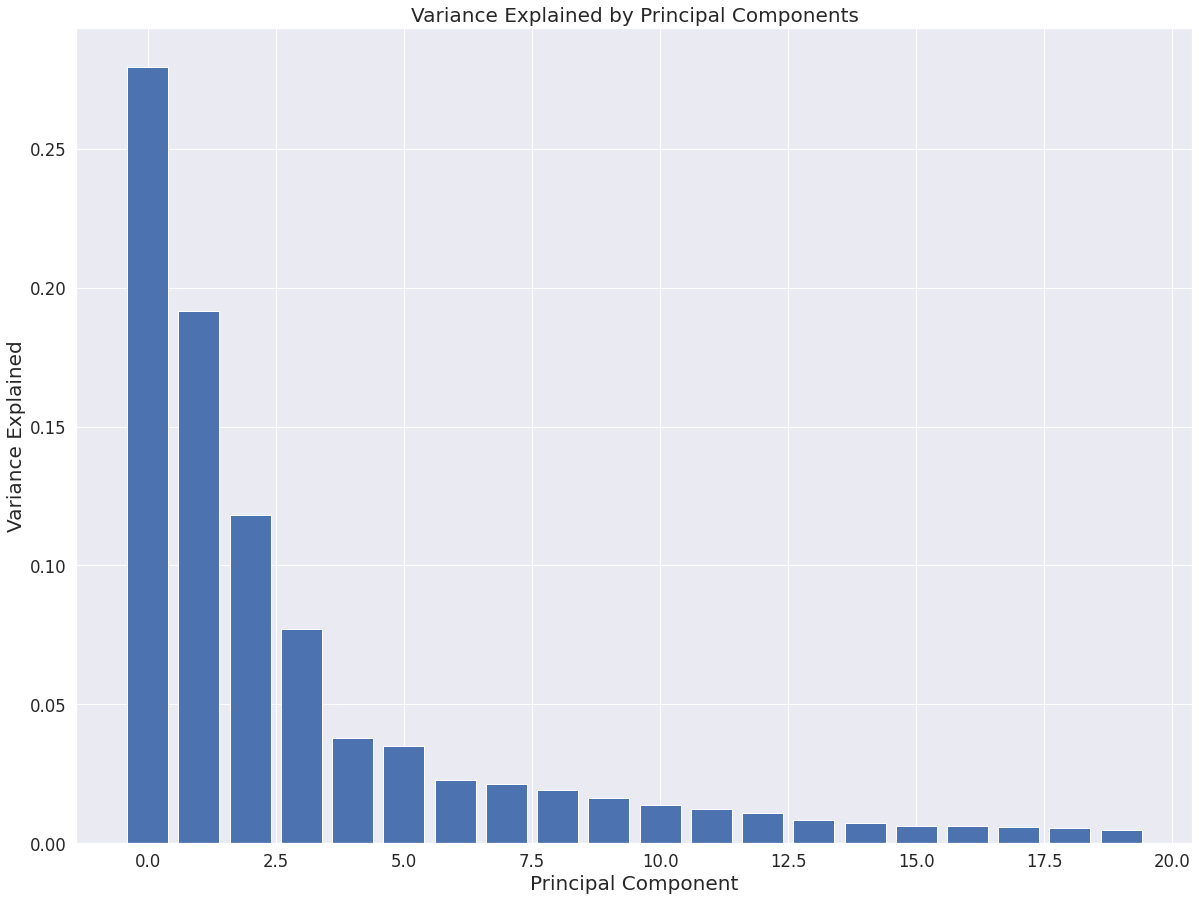

In [9]:
import warnings
warnings.filterwarnings("ignore")

import seaborn as sns
sns.set(font_scale = 1.5)

import numpy as np
from umap.umap_ import UMAP
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA

X = microb1.values
X = np.log10(X + 1)

plt.figure(figsize = (20, 15))
pca = PCA(n_components = 20).fit(X)
index = np.arange(len(pca.explained_variance_ratio_))
plt.bar(index, pca.explained_variance_ratio_)
plt.title('Variance Explained by Principal Components', fontsize = 20)
plt.xlabel("Principal Component", fontsize = 20)
plt.ylabel("Variance Explained", fontsize = 20)
plt.show()

**Visualize using dimensionality reduction PCA**

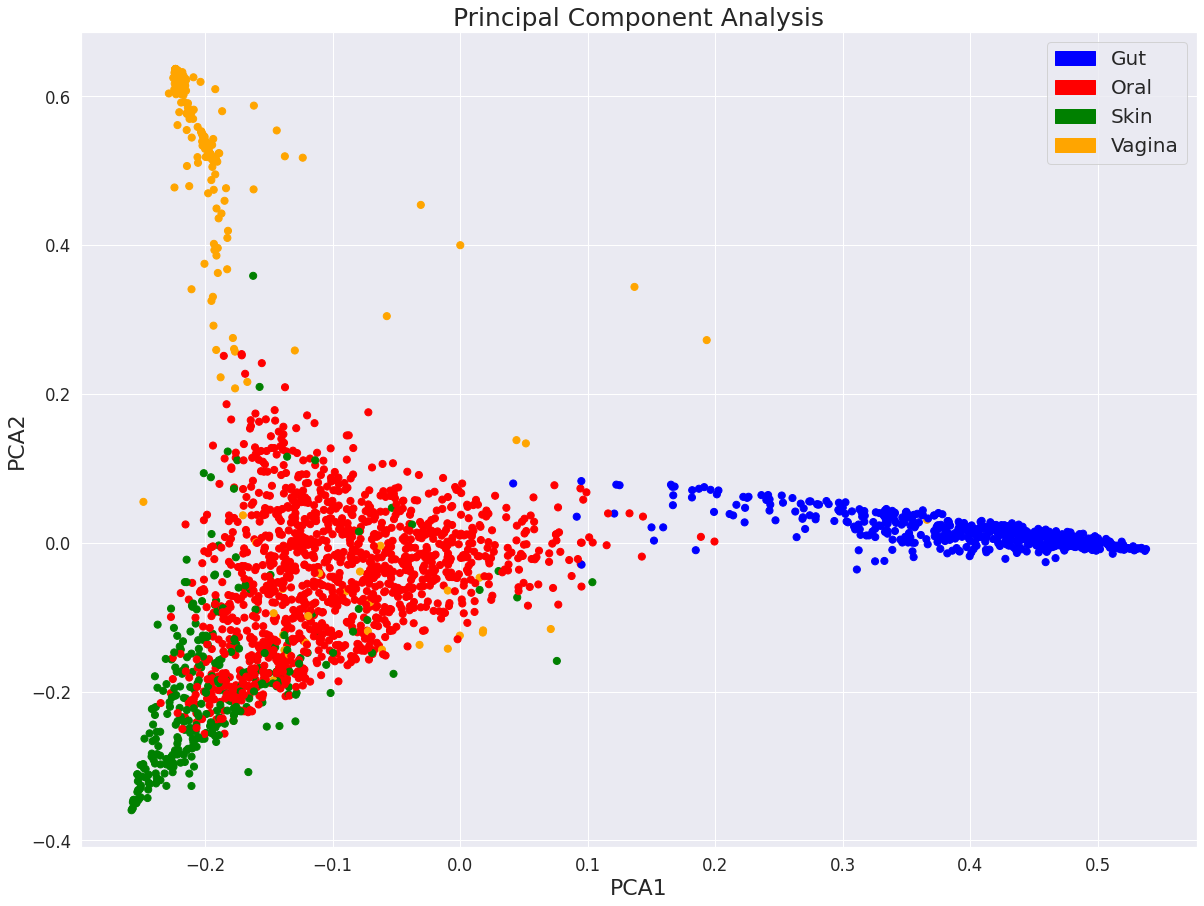

In [10]:
plt.figure(figsize = (20, 15))
X_reduced = PCA(n_components = 2).fit_transform(X)
plt.scatter(X_reduced[:, 0], X_reduced[:, 1], s = 50, c = phen1['Color'])
plt.title('Principal Component Analysis', fontsize = 25)
plt.xlabel("PCA1", fontsize = 22); plt.ylabel("PCA2", fontsize = 22)

from matplotlib import cm
import matplotlib.patches as mpatches
my_legends = [mpatches.Patch(color = 'blue', label = 'Gut'), 
              mpatches.Patch(color = 'red', label = 'Oral'),
              mpatches.Patch(color = 'green', label = 'Skin'),
              mpatches.Patch(color = 'orange', label = 'Vagina')]
plt.legend(handles = my_legends, fontsize = 20)
plt.show()



**Visualize using dimensionality reduction tSNE**

[t-SNE] Computing 151 nearest neighbors...
[t-SNE] Indexed 2355 samples in 0.006s...
[t-SNE] Computed neighbors for 2355 samples in 0.639s...
[t-SNE] Computed conditional probabilities for sample 1000 / 2355
[t-SNE] Computed conditional probabilities for sample 2000 / 2355
[t-SNE] Computed conditional probabilities for sample 2355 / 2355
[t-SNE] Mean sigma: 0.048677
[t-SNE] Computed conditional probabilities in 0.207s
[t-SNE] Iteration 50: error = 61.7672539, gradient norm = 0.0241918 (50 iterations in 0.969s)
[t-SNE] Iteration 100: error = 60.8035507, gradient norm = 0.0240491 (50 iterations in 0.892s)
[t-SNE] Iteration 150: error = 60.4879112, gradient norm = 0.0171319 (50 iterations in 0.884s)
[t-SNE] Iteration 200: error = 60.3241882, gradient norm = 0.0148337 (50 iterations in 0.870s)
[t-SNE] Iteration 250: error = 60.2226105, gradient norm = 0.0173132 (50 iterations in 0.840s)
[t-SNE] KL divergence after 250 iterations with early exaggeration: 60.222610
[t-SNE] Iteration 300: err

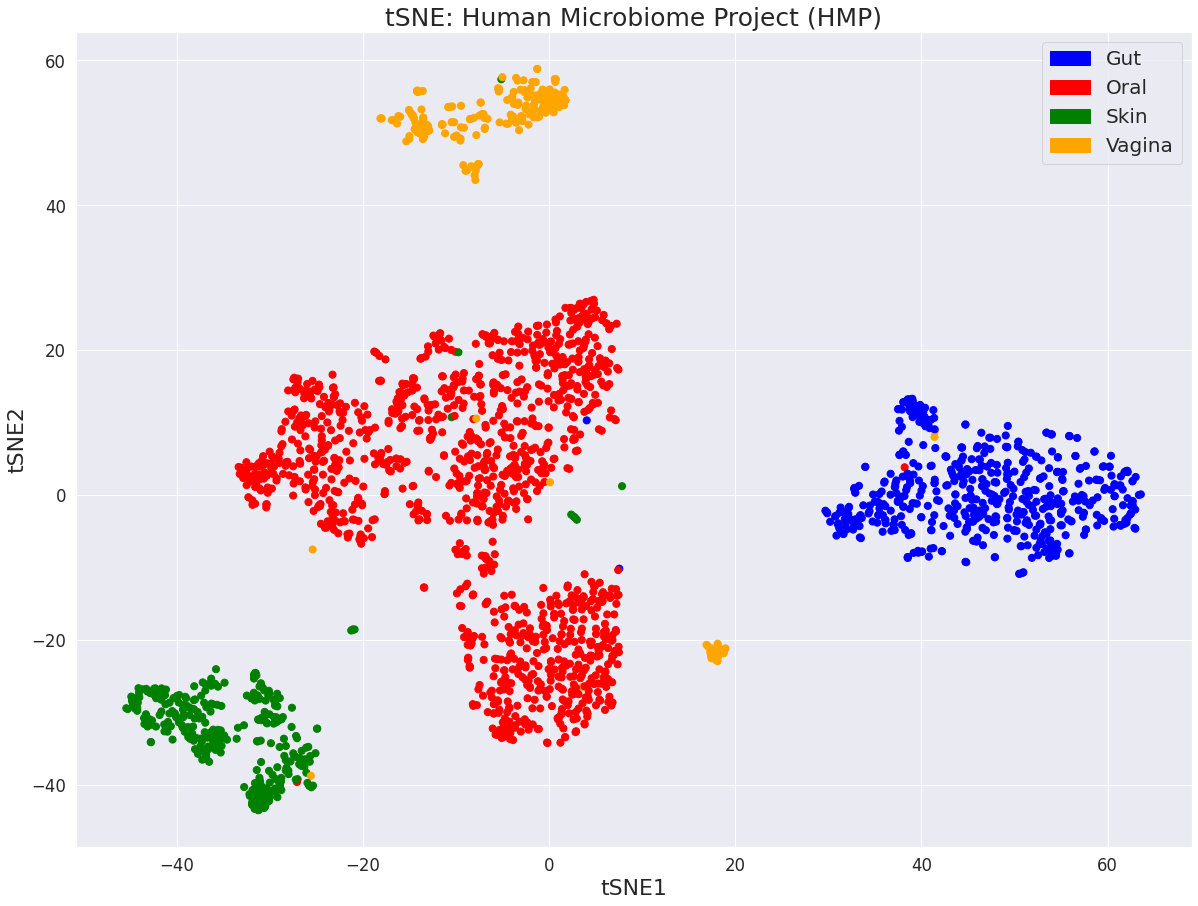

In [11]:
plt.figure(figsize = (20, 15))
model = TSNE(learning_rate = 200, n_components = 2, random_state = 123, perplexity = 50, 
             init = X_reduced, n_iter = 1000, verbose = 2)
tsne = model.fit_transform(X)
plt.scatter(tsne[:, 0], tsne[:, 1], s = 50, c = phen1['Color'])
plt.title('tSNE: Human Microbiome Project (HMP)', fontsize = 25)
plt.xlabel("tSNE1", fontsize = 22); plt.ylabel("tSNE2", fontsize = 22)

from matplotlib import cm
import matplotlib.patches as mpatches
my_legends = [mpatches.Patch(color = 'blue', label = 'Gut'), 
              mpatches.Patch(color = 'red', label = 'Oral'),
              mpatches.Patch(color = 'green', label = 'Skin'),
              mpatches.Patch(color = 'orange', label = 'Vagina')]
plt.legend(handles = my_legends, fontsize = 20)
plt.show()

 

*   PCA and tSNE plots help us to see clearly microbiol by the tissue of origin  (based on microbial abundances not sequencing data).

selecting microbial organisms that separate the Gut, Oral, Skin and Vaginal samples the most

*  



In [12]:
#extract microbial organisms that separate Gut, Oral, Skin and Vaginal samples the most
[print(i) for i in microb1.columns if 'Haemophilus_parahaemolyticus' in i]

k__Bacteria|p__Proteobacteria|c__Gammaproteobacteria|o__Pasteurellales|f__Pasteurellaceae|g__Haemophilus|s__Haemophilus_parahaemolyticus
k__Bacteria|p__Proteobacteria|c__Gammaproteobacteria|o__Pasteurellales|f__Pasteurellaceae|g__Haemophilus|s__Haemophilus_parahaemolyticus|t__GCF_000262265


[None, None]

In [13]:
#select microbes that have high abundance in one tissue but almost zero in all other tissues
microb1.columns.get_loc('k__Bacteria|p__Proteobacteria|c__Gammaproteobacteria|o__Pasteurellales' + \
                       '|f__Pasteurellaceae|g__Haemophilus|s__Haemophilus_parahaemolyticus')

#Haemophilus parahaemolyticus that has an index 1950 in the microbial abundance data frame.

1950

In [14]:
ind = 1950
groupped_data = pd.DataFrame({'Tissue': list(['Oral']*phen1['STArea'].value_counts()['Oral'] + 
                                             ['Skin']*phen1['STArea'].value_counts()['Skin'] + 
                                             ['Vaginal']*phen1['STArea'].value_counts()['Vaginal'] + 
                                             ['Gut']*phen1['STArea'].value_counts()['Gut']),
                             'Abundance': list(microb1.loc[phen1['ID'][phen1['STArea'] == 'Oral'],].iloc[:, ind]) + 
                             list(microb1.loc[phen1['ID'][phen1['STArea'] == 'Skin'],].iloc[:, ind]) + 
                             list(microb1.loc[phen1['ID'][phen1['STArea'] == 'Vaginal'],].iloc[:, ind]) + 
                             list(microb1.loc[phen1['ID'][phen1['STArea'] == 'Gut'],].iloc[:, ind])})
#data_boxplot['Abundance'] = np.log10(data_boxplot['Abundance'] + 1) 
groupped_data

Tissue  Abundance
0      Oral   0.000000
1      Oral   0.014740
2      Oral   0.000000
3      Oral   0.000076
4      Oral   0.000021
...     ...        ...
2350    Gut   0.000000
2351    Gut   0.000000
2352    Gut   0.000000
2353    Gut   0.000000
2354    Gut   0.000000

[2355 rows x 2 columns]

In [15]:
groupped_data.groupby('Tissue').mean()

Abundance
Tissue               
Gut      0.000000e+00
Oral     8.721778e-04
Skin     1.235275e-06
Vaginal  7.692308e-09

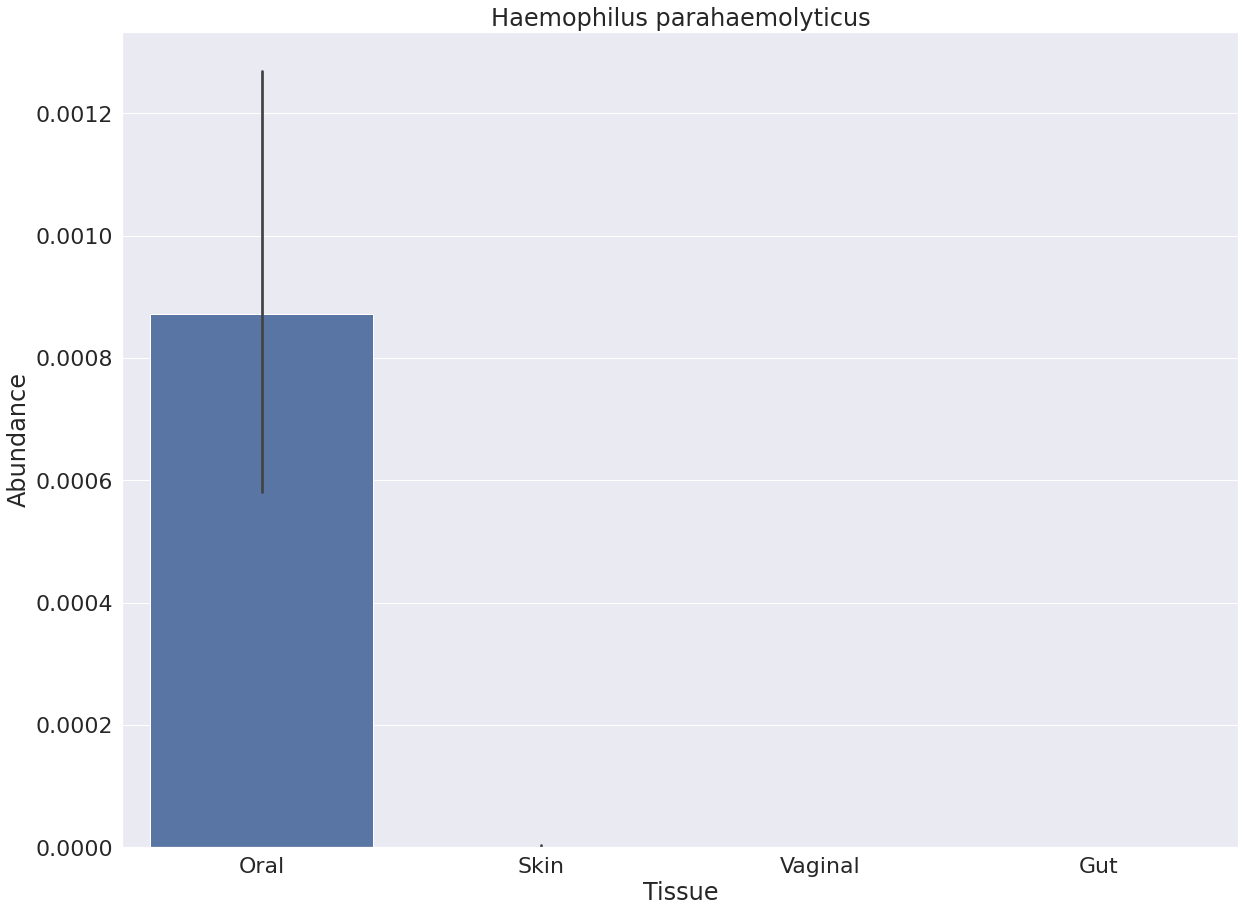

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

sns.set(font_scale = 2)

plt.figure(figsize = (20, 15))
sns.barplot(x = "Tissue", y = "Abundance", data = groupped_data)
plt.title('Haemophilus parahaemolyticus')
plt.show()

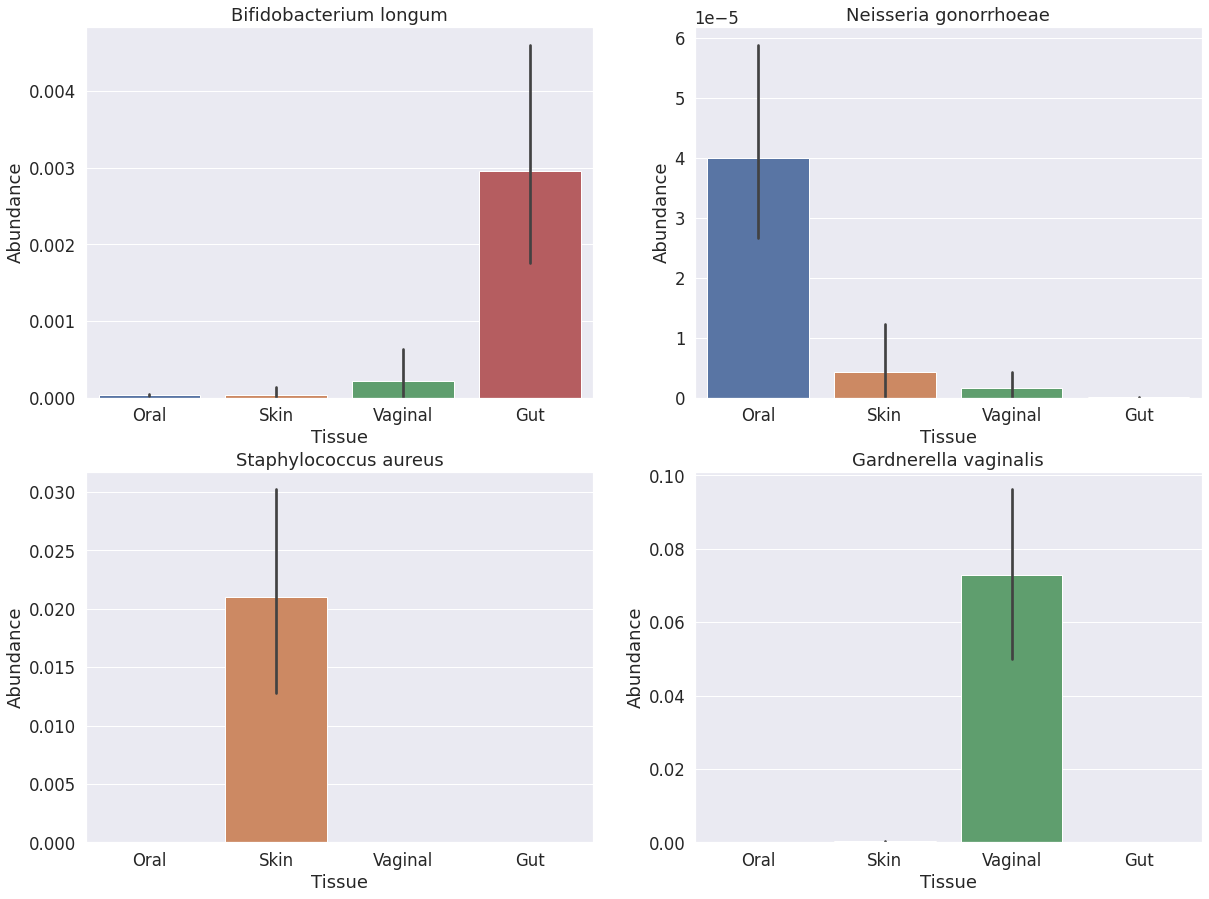

In [17]:
#visualize abundances of a few microbial organisms
import matplotlib.pyplot as plt
plt.figure(figsize = (20,15))

sns.set(font_scale = 1.5)

sample_microb_names = ['Bifidobacterium longum', 'Neisseria gonorrhoeae', 
                       'Staphylococcus aureus', 'Gardnerella vaginalis']

for i, ind in enumerate([284, 1759, 786, 292]):
    
    plt.subplot(2, 2, i + 1)
    groupped_data = pd.DataFrame({'Tissue': list(['Oral']*phen1['STArea'].value_counts()['Oral'] + 
                                                 ['Skin']*phen1['STArea'].value_counts()['Skin'] + 
                                                 ['Vaginal']*phen1['STArea'].value_counts()['Vaginal'] + 
                                                 ['Gut']*phen1['STArea'].value_counts()['Gut']),
                             'Abundance': list(microb1.loc[phen1['ID'][phen1['STArea'] == 'Oral'],].iloc[:, ind]) + 
                             list(microb1.loc[phen1['ID'][phen1['STArea'] == 'Skin'],].iloc[:, ind]) + 
                             list(microb1.loc[phen1['ID'][phen1['STArea'] == 'Vaginal'],].iloc[:, ind]) + 
                             list(microb1.loc[phen1['ID'][phen1['STArea'] == 'Gut'],].iloc[:, ind])})
    sns.barplot(x = "Tissue", y = "Abundance", data = groupped_data)
    plt.title(sample_microb_names[i])

plt.show()

**Remarks:**
*   Bifidobacterium longum is gut-specific (reference yogurts)
*   Neisseria gonorrhoeae is a very oral-specific
*   B Staphylococcus aureus is a known skin-specific bacteria
*   NGardnerella vaginalis is a common marker of vaginal microbiota.



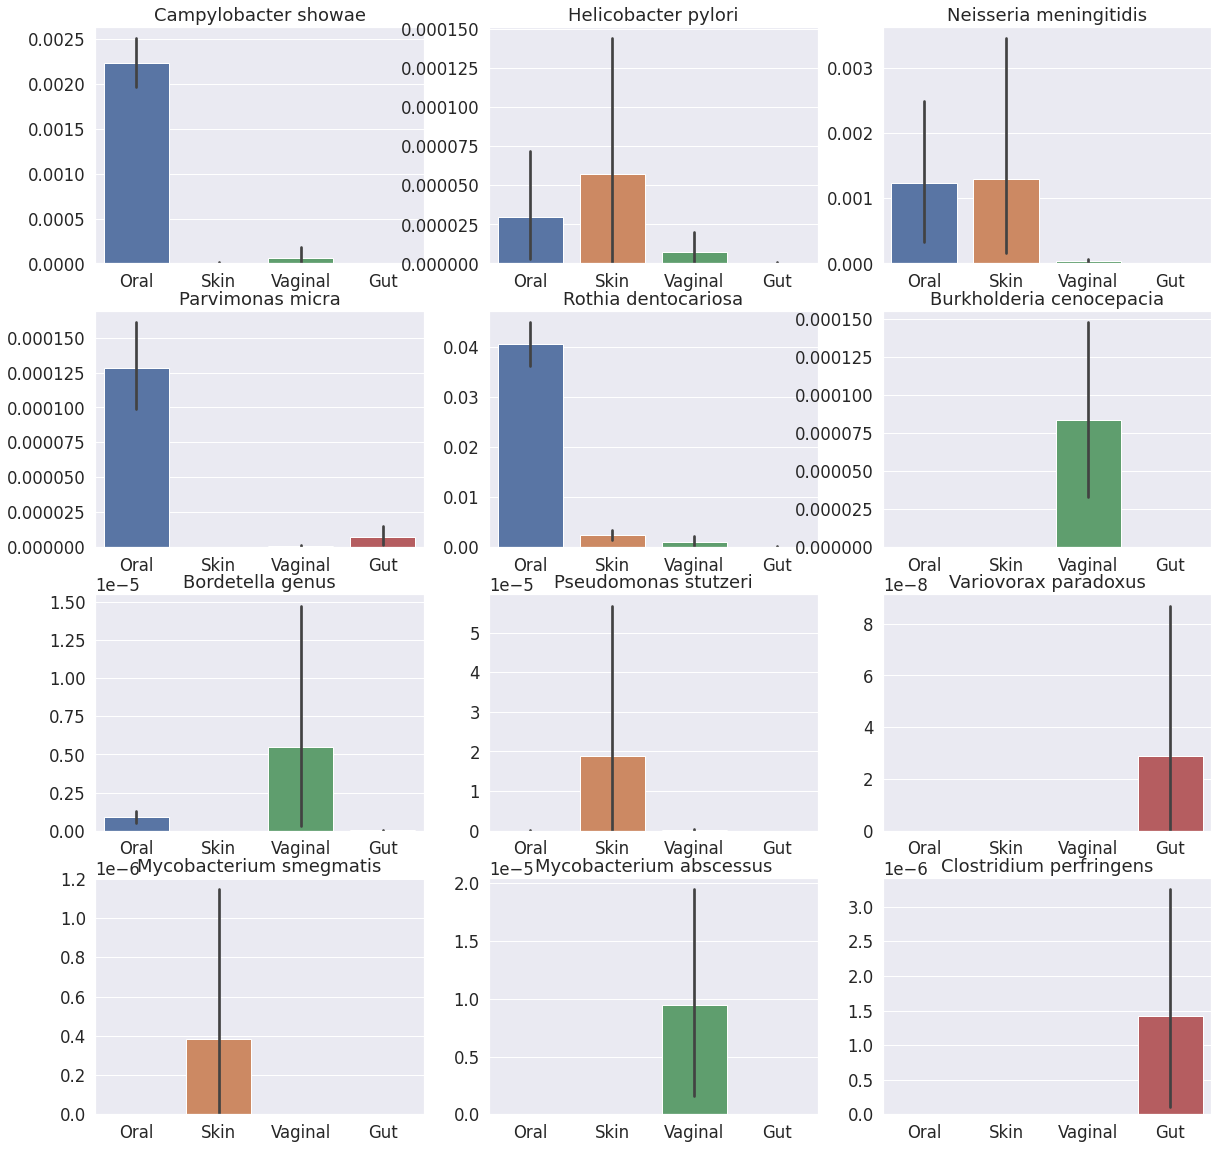

In [18]:
 #display a few more interesting bacteria that often pop up in metagenomics projects
 import matplotlib.pyplot as plt
plt.figure(figsize = (20, 20))

sample_microb_names = ['Campylobacter showae', 'Helicobacter pylori', 'Neisseria meningitidis', 
                       'Parvimonas micra', 'Rothia dentocariosa', 'Burkholderia cenocepacia', 
                       'Bordetella genus', 'Pseudomonas stutzeri', 'Variovorax paradoxus', 
                       'Mycobacterium smegmatis', 'Mycobacterium abscessus', 'Clostridium perfringens']
for i, ind in enumerate([1821, 1832, 1765, 1100, 214, 1654, 1645, 2016, 1697, 230, 226, 1055]):
    
    plt.subplot(4, 3, i + 1)
    groupped_data = pd.DataFrame({'Tissue': list(['Oral']*phen1['STArea'].value_counts()['Oral'] + 
                                                 ['Skin']*phen1['STArea'].value_counts()['Skin'] + 
                                                 ['Vaginal']*phen1['STArea'].value_counts()['Vaginal'] + 
                                                 ['Gut']*phen1['STArea'].value_counts()['Gut']),
                             'Abundance': list(microb1.loc[phen1['ID'][phen1['STArea'] == 'Oral'],].iloc[:, ind]) + 
                             list(microb1.loc[phen1['ID'][phen1['STArea'] == 'Skin'],].iloc[:, ind]) + 
                             list(microb1.loc[phen1['ID'][phen1['STArea'] == 'Vaginal'],].iloc[:, ind]) + 
                             list(microb1.loc[phen1['ID'][phen1['STArea'] == 'Gut'],].iloc[:, ind])})
    sns.barplot(x = "Tissue", y = "Abundance", data = groupped_data)
    plt.xlabel("")
    plt.ylabel("")
    plt.title(sample_microb_names[i])

plt.show()


*   There are a few genera that have species that are tissue-specific in different tissues (i.e Streptococcus genus seems to be very much oral-specific)
*   It possible that you can find Streptococcus species in other tissues such as gut. (i.e species from Streptococcus genus that are gut and oral specific)


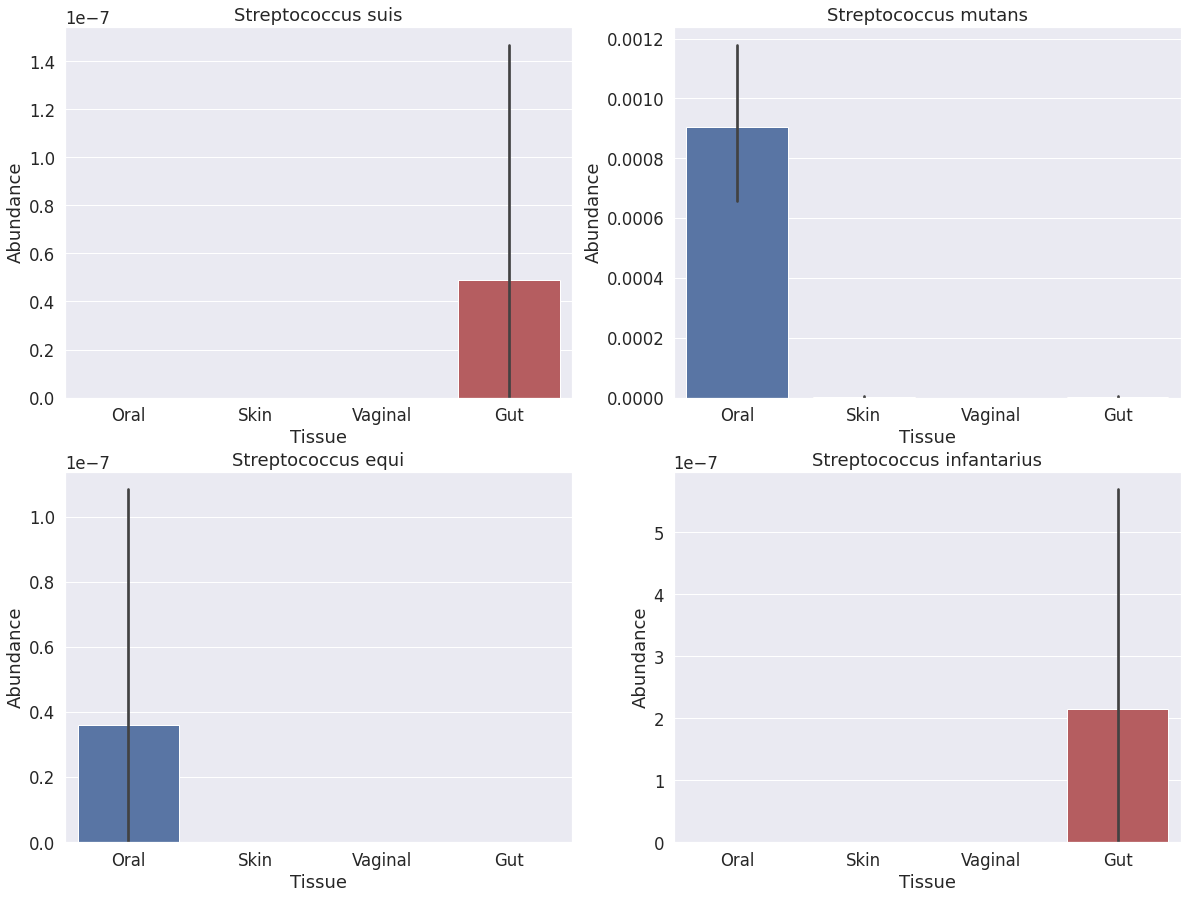

In [19]:
#explore if Streptococcus species can be found in other tissues
import matplotlib.pyplot as plt
plt.figure(figsize = (20,15))

sns.set(font_scale = 1.5)

sample_microb_names = ['Streptococcus suis', 'Streptococcus mutans', 
                       'Streptococcus equi', 'Streptococcus infantarius']
for i, ind in enumerate([1009, 957, 937, 943]):
    
    plt.subplot(2, 2, i + 1)
    groupped_data = pd.DataFrame({'Tissue': list(['Oral']*phen1['STArea'].value_counts()['Oral'] + 
                                                 ['Skin']*phen1['STArea'].value_counts()['Skin'] + 
                                                 ['Vaginal']*phen1['STArea'].value_counts()['Vaginal'] + 
                                                 ['Gut']*phen1['STArea'].value_counts()['Gut']),
                             'Abundance': list(microb1.loc[phen1['ID'][phen1['STArea'] == 'Oral'],].iloc[:, ind]) + 
                             list(microb1.loc[phen1['ID'][phen1['STArea'] == 'Skin'],].iloc[:, ind]) + 
                             list(microb1.loc[phen1['ID'][phen1['STArea'] == 'Vaginal'],].iloc[:, ind]) + 
                             list(microb1.loc[phen1['ID'][phen1['STArea'] == 'Gut'],].iloc[:, ind])})
    sns.barplot(x = "Tissue", y = "Abundance", data = groupped_data)
    plt.title(sample_microb_names[i])

plt.show()

Remarks:

*   Streptococcus suis and Streptococcus infantarius are present in Gut microbiome.


**Downstream analysis**



*   Focus on bacterial microbes only as classified under HMP database based on genus level (ignore archeae and viruses).
*   Keep bacteria only for further analysis



In [20]:
#build lists of tissue-specific bacterial genera and use their names for grepping bacterial reference genomes from the RefSeq NCBI database.
import numpy as np
import pandas as pd

#Here I attempted to filter out low abundant microbes using the following R codes:
#low.count.removal = function(data, # OTU count data frame of size n (sample) x p (OTU)
#                             percent=0.001 # cutoff chosen)
#                             {
#                                 keep.otu = which(colSums(data)*100/(sum(colSums(data))) > percent)
#                                 data.filter = data[,keep.otu]
#                                 return(list(data.filter = data.filter, keep.otu = keep.otu))
#                             }
#microb_clean<-low.count.removal(microb)$data.filter

#The microbe_clean.txt file contained microbes present in at least 0.1% of samples
#microb = pd.read_csv('/home/nikolay/Documents/Medium/DeepLearningMetagenomics/microb_clean.txt', sep = '\t')


#Select only bacterial genus level microbial abundances
microb2 = microb1[[i for i in list(microb1.columns) if not 's__' in i and 'g__' in i 
                 and 'k__Bacteria' in i and not 'noname' in i and not 'unclassified' in i]]

microb2

k__Bacteria|p__Acidobacteria|c__Acidobacteriia|o__Acidobacteriales|f__Acidobacteriaceae|g__Granulicella  \
SRS011061                                                0.0                                                         
SRS011084                                                0.0                                                         
SRS011086                                                0.0                                                         
SRS011090                                                0.0                                                         
SRS011098                                                0.0                                                         
...                                                      ...                                                         
SRS971275                                                0.0                                                         
SRS971276                                                0.0                                                         
SRS971277                                                0.0                                                         
SRS971427                                                0.0                                                         
SRS971428                                                0.0                                                         

           k__Bacteria|p__Acidobacteria|c__Acidobacteriia|o__Acidobacteriales|f__Acidobacteriaceae|g__Terriglobus  \
SRS011061                                                0.0                                                        
SRS011084                                                0.0                                                        
SRS011086                                                0.0                                                        
SRS011090                                                0.0                                                        
SRS011098                                                0.0                                                        
...                                                      ...                                                        
SRS971275                                                0.0                                                        
SRS971276                                                0.0                                                        
SRS971277                                                0.0                                                        
SRS971427                                                0.0                                                        
SRS971428                                                0.0                                                        

           k__Bacteria|p__Actinobacteria|c__Actinobacteria|o__Actinomycetales|f__Actinomycetaceae|g__Actinobaculum  \
SRS011061                                           0.000000                                                         
SRS011084                                           0.000000                                                         
SRS011086                                           0.000061                                                         
SRS011090                                           0.000000                                                         
SRS011098                                           0.014370                                                         
...                                                      ...                                                         
SRS971275                                           0.000000                                                         
SRS971276                                           0.000000                                                         
SRS971277                                           0.000000                                                         
SRS971427



*  We found about 227 bacterial genera present based on the HMP project classeification.
*   List item



In [21]:
#build lists of Oral-specific, Skin-specific, Vagina-specific and Gut-specific genera
# genus will considered to be tissue-specific if is 10 times more abundant in one tissue compared to all other tissues.
oral_specific_list = list(); oral_specific_ratio_list = list()
gut_specific_list = list(); gut_specific_ratio_list = list()
skin_specific_list = list(); skin_specific_ratio_list = list()
vagina_specific_list = list(); vagina_specific_ratio_list = list()

for ind in range(len(microb2.columns)):
    
    my_data = pd.DataFrame({'Tissue': list(['Oral']*phen1['STArea'].value_counts()['Oral'] + 
                                           ['Skin']*phen1['STArea'].value_counts()['Skin'] + 
                                           ['Vaginal']*phen1['STArea'].value_counts()['Vaginal'] + 
                                           ['Gut']*phen1['STArea'].value_counts()['Gut']),
                             'Abundance': list(microb2.loc[phen1['ID'][phen1['STArea'] == 'Oral'],].iloc[:, ind]) + 
                             list(microb2.loc[phen1['ID'][phen1['STArea'] == 'Skin'],].iloc[:, ind]) + 
                             list(microb2.loc[phen1['ID'][phen1['STArea'] == 'Vaginal'],].iloc[:, ind]) + 
                             list(microb2.loc[phen1['ID'][phen1['STArea'] == 'Gut'],].iloc[:, ind])})
    
    ratio = float(my_data.groupby('Tissue', sort=False).mean().sort_values(
        'Abundance', ascending = True).iloc[3, :] / my_data.groupby('Tissue', sort = False).mean().sort_values(
        'Abundance', ascending = True).iloc[2, :])
    
    if( ratio > 10 and 'k__Bacteria' in microb2.columns[ind] and 'g__' in microb2.columns[ind]):
        
        if(my_data.groupby('Tissue', sort = False).mean().sort_values(
        'Abundance', ascending = True).index[3] == 'Oral'):
            oral_specific_list.append(microb2.columns[ind])
            oral_specific_ratio_list.append(ratio)
        
        if(my_data.groupby('Tissue', sort = False).mean().sort_values(
        'Abundance', ascending = True).index[3] == 'Skin'):
            skin_specific_list.append(microb2.columns[ind])
            skin_specific_ratio_list.append(ratio)
            
        if(my_data.groupby('Tissue', sort = False).mean().sort_values(
        'Abundance', ascending = True).index[3] == 'Vaginal'):
            vagina_specific_list.append(microb2.columns[ind])
            vagina_specific_ratio_list.append(ratio)
            
        if(my_data.groupby('Tissue', sort = False).mean().sort_values(
        'Abundance', ascending = True).index[3] == 'Gut'):
            gut_specific_list.append(microb2.columns[ind])
            gut_specific_ratio_list.append(ratio)
            
    if((ind + 1) % 100 == 0):
        print('Processed: {} microbes'.format(ind + 1))

Processed: 100 microbes
Processed: 200 microbes


In [22]:
#lets check how many vagina-specific bacterial genera
len(vagina_specific_list)

#we found 16 vagina-specific bacterial genera

16

In [23]:
# list them
vagina_specific_list

['k__Bacteria|p__Actinobacteria|c__Actinobacteria|o__Actinomycetales|f__Actinomycetaceae|g__Mobiluncus',
 'k__Bacteria|p__Actinobacteria|c__Actinobacteria|o__Actinomycetales|f__Mycobacteriaceae|g__Mycobacterium',
 'k__Bacteria|p__Actinobacteria|c__Actinobacteria|o__Bifidobacteriales|f__Bifidobacteriaceae|g__Gardnerella',
 'k__Bacteria|p__Bacteroidetes|c__Flavobacteriia|o__Flavobacteriales|f__Flavobacteriaceae|g__Elizabethkingia',
 'k__Bacteria|p__Chlamydiae|c__Chlamydiia|o__Chlamydiales|f__Chlamydiaceae|g__Chlamydia',
 'k__Bacteria|p__Firmicutes|c__Bacilli|o__Bacillales|f__Bacillaceae|g__Marinococcus',
 'k__Bacteria|p__Firmicutes|c__Bacilli|o__Lactobacillales|f__Lactobacillaceae|g__Lactobacillus',
 'k__Bacteria|p__Proteobacteria|c__Alphaproteobacteria|o__Caulobacterales|f__Caulobacteraceae|g__Asticcacaulis',
 'k__Bacteria|p__Proteobacteria|c__Alphaproteobacteria|o__Caulobacterales|f__Caulobacteraceae|g__Caulobacter',
 'k__Bacteria|p__Proteobacteria|c__Alphaproteobacteria|o__Rhodospiril

**Rank the 16 vagina-specific bacterial genera by fold change**

*   Mean abundance in the tissue of main presence divided by the mean abundance of the second main tissue of presence.

In [24]:
#Rank the 16 vagina-specific bacterial genera by fold change
df_vagina_specific = pd.DataFrame({'BACTERIA': vagina_specific_list, 'RATIO': vagina_specific_ratio_list})
df_vagina_specific = df_vagina_specific.sort_values('RATIO', ascending = False)
df_vagina_specific = df_vagina_specific.iloc[0:df_vagina_specific.shape[0],:]
pd.options.display.max_colwidth = 170
df_vagina_specific

BACTERIA  \
3        k__Bacteria|p__Bacteroidetes|c__Flavobacteriia|o__Flavobacteriales|f__Flavobacteriaceae|g__Elizabethkingia   
4                             k__Bacteria|p__Chlamydiae|c__Chlamydiia|o__Chlamydiales|f__Chlamydiaceae|g__Chlamydia   
5                                 k__Bacteria|p__Firmicutes|c__Bacilli|o__Bacillales|f__Bacillaceae|g__Marinococcus   
11        k__Bacteria|p__Proteobacteria|c__Betaproteobacteria|o__Burkholderiales|f__Alcaligenaceae|g__Achromobacter   
14     k__Bacteria|p__Proteobacteria|c__Betaproteobacteria|o__Burkholderiales|f__Oxalobacteraceae|g__Herbaspirillum   
15                    k__Bacteria|p__Tenericutes|c__Mollicutes|o__Mycoplasmatales|f__Mycoplasmataceae|g__Ureaplasma   
2         k__Bacteria|p__Actinobacteria|c__Actinobacteria|o__Bifidobacteriales|f__Bifidobacteriaceae|g__Gardnerella   
6                      k__Bacteria|p__Firmicutes|c__Bacilli|o__Lactobacillales|f__Lactobacillaceae|g__Lactobacillus   
0              k__Bacteria|p__Actinobacteria|c__Actinobacteria|o__Actinomycetales|f__Actinomycetaceae|g__Mobiluncus   
12       k__Bacteria|p__Proteobacteria|c__Betaproteobacteria|o__Burkholderiales|f__Burkholderiaceae|g__Burkholderia   
9   k__Bacteria|p__Proteobacteria|c__Alphaproteobacteria|o__Rhodospirillales|f__Rhodospirillaceae|g__Rhodospirillum   
10    k__Bacteria|p__Proteobacteria|c__Alphaproteobacteria|o__Sphingomonadales|f__Sphingomonadaceae|g__Sphingopyxis   
8        k__Bacteria|p__Proteobacteria|c__Alphaproteobacteria|o__Caulobacterales|f__Caulobacteraceae|g__Caulobacter   
13          k__Bacteria|p__Proteobacteria|c__Betaproteobacteria|o__Burkholderiales|f__Burkholderiaceae|g__Ralstonia   
7      k__Bacteria|p__Proteobacteria|c__Alphaproteobacteria|o__Caulobacterales|f__Caulobacteraceae|g__Asticcacaulis   
1           k__Bacteria|p__Actinobacteria|c__Actinobacteria|o__Actinomycetales|f__Mycobacteriaceae|g__Mycobacterium   

           RATIO  
3            inf  
4            inf  
5            inf  
11           inf  
14  2.975405e+04  
15  6.047437e+02  
2   2.833811e+02  
6   2.495363e+02  
0   9.536711e+01  
12  5.581412e+01  
9   4.148335e+01  
10  3.696578e+01  
8   3.354955e+01  
13  2.512251e+01  
7   2.402896e+01  
1   2.074278e+01

**Remarks:**

*   In the list of vagina-specific bacterial genera (at least 10 times more abundant in the main tissue compared to any other tissue)
*   above we can immediately see a few "strange" genera such as **Burkholderia**(Achromobacter) or **Ralstonia**



In [25]:
#lets check how many oral-specific bacterial genera
len(oral_specific_list)

61

In [26]:
oral_specific_list

['k__Bacteria|p__Acidobacteria|c__Acidobacteriia|o__Acidobacteriales|f__Acidobacteriaceae|g__Terriglobus',
 'k__Bacteria|p__Actinobacteria|c__Actinobacteria|o__Actinomycetales|f__Actinomycetaceae|g__Actinobaculum',
 'k__Bacteria|p__Actinobacteria|c__Actinobacteria|o__Actinomycetales|f__Actinomycetaceae|g__Actinomyces',
 'k__Bacteria|p__Actinobacteria|c__Actinobacteria|o__Actinomycetales|f__Dermatophilaceae|g__Kineosphaera',
 'k__Bacteria|p__Actinobacteria|c__Actinobacteria|o__Actinomycetales|f__Micrococcaceae|g__Rothia',
 'k__Bacteria|p__Actinobacteria|c__Actinobacteria|o__Actinomycetales|f__Pseudonocardiaceae|g__Saccharomonospora',
 'k__Bacteria|p__Actinobacteria|c__Actinobacteria|o__Bifidobacteriales|f__Bifidobacteriaceae|g__Alloscardovia',
 'k__Bacteria|p__Actinobacteria|c__Actinobacteria|o__Bifidobacteriales|f__Bifidobacteriaceae|g__Parascardovia',
 'k__Bacteria|p__Actinobacteria|c__Actinobacteria|o__Bifidobacteriales|f__Bifidobacteriaceae|g__Scardovia',
 'k__Bacteria|p__Actinobact

In [27]:
#Rank the 61 Oral-specific bacterial genera by fold change
df_oral_specific = pd.DataFrame({'BACTERIA': oral_specific_list, 'RATIO': oral_specific_ratio_list})
df_oral_specific = df_oral_specific.sort_values('RATIO', ascending = False)
df_oral_specific = df_oral_specific.iloc[0:df_oral_specific.shape[0],:]
pd.options.display.max_colwidth = 170
df_oral_specific

BACTERIA  \
0                  k__Bacteria|p__Acidobacteria|c__Acidobacteriia|o__Acidobacteriales|f__Acidobacteriaceae|g__Terriglobus   
22  k__Bacteria|p__Firmicutes|c__Clostridia|o__Clostridiales|f__Clostridiales_Family_XIII_Incertae_Sedis|g__Mogibacterium   
26                             k__Bacteria|p__Firmicutes|c__Clostridia|o__Clostridiales|f__Lachnospiraceae|g__Johnsonella   
28                          k__Bacteria|p__Firmicutes|c__Clostridia|o__Clostridiales|f__Lachnospiraceae|g__Shuttleworthia   
33                k__Bacteria|p__Firmicutes|c__Erysipelotrichia|o__Erysipelotrichales|f__Erysipelotrichaceae|g__Eggerthia   
..                                                                                                                    ...   
14              k__Bacteria|p__Bacteroidetes|c__Flavobacteriia|o__Flavobacteriales|f__Flavobacteriaceae|g__Capnocytophaga   
21                           k__Bacteria|p__Firmicutes|c__Bacilli|o__Lactobacillales|f__Streptococcaceae|g__Streptococcus   
38                        k__Bacteria|p__Firmicutes|c__Negativicutes|o__Selenomonadales|f__Veillonellaceae|g__Veillonella   
31                k__Bacteria|p__Firmicutes|c__Clostridia|o__Clostridiales|f__Peptostreptococcaceae|g__Peptostreptococcus   
42                k__Bacteria|p__Proteobacteria|c__Betaproteobacteria|o__Burkholderiales|f__Burkholderiaceae|g__Lautropia   

        RATIO  
0         inf  
22        inf  
26        inf  
28        inf  
33        inf  
..        ...  
14  14.186069  
21  13.336718  
38  13.185902  
31  11.532787  
42  11.007495  

[61 rows x 2 columns]

In [28]:
len(skin_specific_list)

49

In [29]:
skin_specific_list

['k__Bacteria|p__Actinobacteria|c__Actinobacteria|o__Actinomycetales|f__Cellulomonadaceae|g__Cellulomonas',
 'k__Bacteria|p__Actinobacteria|c__Actinobacteria|o__Actinomycetales|f__Corynebacteriaceae|g__Turicella',
 'k__Bacteria|p__Actinobacteria|c__Actinobacteria|o__Actinomycetales|f__Dermabacteraceae|g__Brachybacterium',
 'k__Bacteria|p__Actinobacteria|c__Actinobacteria|o__Actinomycetales|f__Dietziaceae|g__Dietzia',
 'k__Bacteria|p__Actinobacteria|c__Actinobacteria|o__Actinomycetales|f__Gordoniaceae|g__Gordonia',
 'k__Bacteria|p__Actinobacteria|c__Actinobacteria|o__Actinomycetales|f__Intrasporangiaceae|g__Janibacter',
 'k__Bacteria|p__Actinobacteria|c__Actinobacteria|o__Actinomycetales|f__Microbacteriaceae|g__Agromyces',
 'k__Bacteria|p__Actinobacteria|c__Actinobacteria|o__Actinomycetales|f__Microbacteriaceae|g__Curtobacterium',
 'k__Bacteria|p__Actinobacteria|c__Actinobacteria|o__Actinomycetales|f__Micrococcaceae|g__Kocuria',
 'k__Bacteria|p__Actinobacteria|c__Actinobacteria|o__Actin

In [30]:
df_skin_specific = pd.DataFrame({'BACTERIA': skin_specific_list, 'RATIO': skin_specific_ratio_list})
df_skin_specific = df_skin_specific.sort_values('RATIO', ascending = False)
df_skin_specific = df_skin_specific.iloc[0:df_skin_specific.shape[0],:]
pd.options.display.max_colwidth = 170
df_skin_specific

BACTERIA  \
0               k__Bacteria|p__Actinobacteria|c__Actinobacteria|o__Actinomycetales|f__Cellulomonadaceae|g__Cellulomonas   
34                 k__Bacteria|p__Proteobacteria|c__Gammaproteobacteria|o__Aeromonadales|f__Aeromonadaceae|g__Aeromonas   
26                 k__Bacteria|p__Proteobacteria|c__Alphaproteobacteria|o__Rhizobiales|f__Rhizobiaceae|g__Agrobacterium   
27                     k__Bacteria|p__Proteobacteria|c__Alphaproteobacteria|o__Rhizobiales|f__Rhizobiaceae|g__Rhizobium   
29           k__Bacteria|p__Proteobacteria|c__Alphaproteobacteria|o__Rhodospirillales|f__Acetobacteraceae|g__Roseomonas   
30                  k__Bacteria|p__Proteobacteria|c__Betaproteobacteria|o__Burkholderiales|f__Comamonadaceae|g__Delftia   
32               k__Bacteria|p__Proteobacteria|c__Betaproteobacteria|o__Burkholderiales|f__Oxalobacteraceae|g__Massilia   
33                  k__Bacteria|p__Proteobacteria|c__Deltaproteobacteria|o__Myxococcales|f__Myxococcaceae|g__Myxococcus   
35         k__Bacteria|p__Proteobacteria|c__Gammaproteobacteria|o__Alteromonadales|f__Alteromonadaceae|g__Alishewanella   
17                                        k__Bacteria|p__Firmicutes|c__Bacilli|o__Bacillales|f__Bacillaceae|g__Bacillus   
38        k__Bacteria|p__Proteobacteria|c__Gammaproteobacteria|o__Enterobacteriales|f__Enterobacteriaceae|g__Morganella   
41          k__Bacteria|p__Proteobacteria|c__Gammaproteobacteria|o__Enterobacteriales|f__Enterobacteriaceae|g__Rahnella   
42               k__Bacteria|p__Proteobacteria|c__Gammaproteobacteria|o__Legionellales|f__Coxiellaceae|g__Rickettsiella   
43             k__Bacteria|p__Proteobacteria|c__Gammaproteobacteria|o__Oceanospirillales|f__Halomonadaceae|g__Halomonas   
46                k__Bacteria|p__Proteobacteria|c__Gammaproteobacteria|o__Pseudomonadales|f__Moraxellaceae|g__Moraxella   
47     k__Bacteria|p__Proteobacteria|c__Gammaproteobacteria|o__Xanthomonadales|f__Xanthomonadaceae|g__Pseudoxanthomonas   
1                 k__Bacteria|p__Actinobacteria|c__Actinobacteria|o__Actinomycetales|f__Corynebacteriaceae|g__Turicella   
48                        k__Bacteria|p__Synergistetes|c__Synergistia|o__Synergistales|f__Synergistaceae|g__Jonquetella   
10             k__Bacteria|p__Actinobacteria|c__Actinobacteria|o__Actinomycetales|f__Micromonosporaceae|g__Actinoplanes   
14                k__Bacteria|p__Bacteroidetes|c__Flavobacteriia|o__Flavobacteriales|f__Flavobacteriaceae|g__Bergeyella   
4                        k__Bacteria|p__Actinobacteria|c__Actinobacteria|o__Actinomycetales|f__Gordoniaceae|g__Gordonia   
5                k__Bacteria|p__Actinobacteria|c__Actinobacteria|o__Actinomycetales|f__Intrasporangiaceae|g__Janibacter   
6                  k__Bacteria|p__Actinobacteria|c__Actinobacteria|o__Actinomycetales|f__Microbacteriaceae|g__Agromyces   
7             k__Bacteria|p__Actinobacteria|c__Actinobacteria|o__Actinomycetales|f__Microbacteriaceae|g__Curtobacterium   
11                k__Bacteria|p__Actinobacteria|c__Actinobacteria|o__Actinomycetales|f__Nocardioidaceae|g__Nocardioides   
13                          k__Bacteria|p__Bacteroidetes|c__Cytophagia|o__Cytophagales|f__Cytophagaceae|g__Hymenobacter   
3                          k__Bacteria|p__Actinobacteria|c__Actinobacteria|o__Actinomycetales|f__Dietziaceae|g__Dietzia   
16                               k__Bacteria|p__Deinococcus_Thermus|c__Deinococci|o__Thermales|f__Thermaceae|g__Thermus   
23                       k__Bacteria|p__Firmicutes|c__Bacilli|o__Lactobacillales|f__Carnobacteriaceae|g__Dolosigranulum   
15          k__Bacteria|p__Bacteroidetes|c__Flavobacteriia|o__Flavobacteriales|f__Flavobacteriaceae|g__Chryseobacterium   
19                            k__Bacteria|p__Firmicutes|c__Bacilli|o__Bacillales|f__Staphylococcaceae|g__Staphylococcus   
2             k__Bacteria|p__Actinobacteria|c__Actinobacteria|o__Actinomycetales|f__Dermabacteraceae|g__Brachybacterium   
9                   k__Bacteria|p__Actinobacteria|c_

In [31]:
len(gut_specific_list)

53

In [32]:
gut_specific_list

['k__Bacteria|p__Actinobacteria|c__Actinobacteria|o__Coriobacteriales|f__Coriobacteriaceae|g__Adlercreutzia',
 'k__Bacteria|p__Actinobacteria|c__Actinobacteria|o__Coriobacteriales|f__Coriobacteriaceae|g__Collinsella',
 'k__Bacteria|p__Actinobacteria|c__Actinobacteria|o__Coriobacteriales|f__Coriobacteriaceae|g__Eggerthella',
 'k__Bacteria|p__Actinobacteria|c__Actinobacteria|o__Coriobacteriales|f__Coriobacteriaceae|g__Gordonibacter',
 'k__Bacteria|p__Bacteroidetes|c__Bacteroidia|o__Bacteroidales|f__Bacteroidaceae|g__Bacteroides',
 'k__Bacteria|p__Bacteroidetes|c__Bacteroidia|o__Bacteroidales|f__Porphyromonadaceae|g__Barnesiella',
 'k__Bacteria|p__Bacteroidetes|c__Bacteroidia|o__Bacteroidales|f__Porphyromonadaceae|g__Butyricimonas',
 'k__Bacteria|p__Bacteroidetes|c__Bacteroidia|o__Bacteroidales|f__Porphyromonadaceae|g__Coprobacter',
 'k__Bacteria|p__Bacteroidetes|c__Bacteroidia|o__Bacteroidales|f__Porphyromonadaceae|g__Dysgonomonas',
 'k__Bacteria|p__Bacteroidetes|c__Bacteroidia|o__Bacter

In [33]:
df_gut_specific = pd.DataFrame({'BACTERIA': gut_specific_list, 'RATIO': gut_specific_ratio_list})
df_gut_specific = df_gut_specific.sort_values('RATIO', ascending = False)
df_gut_specific = df_gut_specific.iloc[0:df_gut_specific.shape[0],:]
pd.options.display.max_colwidth = 170
df_gut_specific

BACTERIA  \
0            k__Bacteria|p__Actinobacteria|c__Actinobacteria|o__Coriobacteriales|f__Coriobacteriaceae|g__Adlercreutzia   
48                     k__Bacteria|p__Spirochaetes|c__Spirochaetia|o__Spirochaetales|f__Brachyspiraceae|g__Brachyspira   
36          k__Bacteria|p__Firmicutes|c__Erysipelotrichia|o__Erysipelotrichales|f__Erysipelotrichaceae|g__Turicibacter   
25                       k__Bacteria|p__Firmicutes|c__Clostridia|o__Clostridiales|f__Lachnospiraceae|g__Marvinbryantia   
41           k__Bacteria|p__Proteobacteria|c__Betaproteobacteria|o__Burkholderiales|f__Oxalobacteraceae|g__Oxalobacter   
32           k__Bacteria|p__Firmicutes|c__Erysipelotrichia|o__Erysipelotrichales|f__Erysipelotrichaceae|g__Allobaculum   
14                                 k__Bacteria|p__Chlorobi|c__Chlorobia|o__Chlorobiales|f__Chlorobiaceae|g__Chlorobium   
46       k__Bacteria|p__Proteobacteria|c__Gammaproteobacteria|o__Enterobacteriales|f__Enterobacteriaceae|g__Raoultella   
47         k__Bacteria|p__Proteobacteria|c__Gammaproteobacteria|o__Enterobacteriales|f__Enterobacteriaceae|g__Shigella   
16                        k__Bacteria|p__Firmicutes|c__Clostridia|o__Clostridiales|f__Clostridiaceae|g__Butyricicoccus   
8                   k__Bacteria|p__Bacteroidetes|c__Bacteroidia|o__Bacteroidales|f__Porphyromonadaceae|g__Dysgonomonas   
50                       k__Bacteria|p__Synergistetes|c__Synergistia|o__Synergistales|f__Synergistaceae|g__Synergistes   
3            k__Bacteria|p__Actinobacteria|c__Actinobacteria|o__Coriobacteriales|f__Coriobacteriaceae|g__Gordonibacter   
49                    k__Bacteria|p__Synergistetes|c__Synergistia|o__Synergistales|f__Synergistaceae|g__Pyramidobacter   
51       k__Bacteria|p__Tenericutes|c__Mollicutes|o__Acholeplasmatales|f__Acholeplasmataceae|g__Candidatus_Phytoplasma   
34         k__Bacteria|p__Firmicutes|c__Erysipelotrichia|o__Erysipelotrichales|f__Erysipelotrichaceae|g__Coprobacillus   
20                         k__Bacteria|p__Firmicutes|c__Clostridia|o__Clostridiales|f__Lachnospiraceae|g__Anaerostipes   
45  k__Bacteria|p__Proteobacteria|c__Deltaproteobacteria|o__Desulfovibrionales|f__Desulfovibrionaceae|g__Desulfovibrio   
6                  k__Bacteria|p__Bacteroidetes|c__Bacteroidia|o__Bacteroidales|f__Porphyromonadaceae|g__Butyricimonas   
40                       k__Bacteria|p__Firmicutes|c__Negativicutes|o__Selenomonadales|f__Veillonellaceae|g__Megamonas   
38        k__Bacteria|p__Firmicutes|c__Negativicutes|o__Selenomonadales|f__Acidaminococcaceae|g__Phascolarctobacterium   
44      k__Bacteria|p__Proteobacteria|c__Deltaproteobacteria|o__Desulfovibrionales|f__Desulfovibrionaceae|g__Bilophila   
37              k__Bacteria|p__Firmicutes|c__Negativicutes|o__Selenomonadales|f__Acidaminococcaceae|g__Acidaminococcus   
42          k__Bacteria|p__Proteobacteria|c__Betaproteobacteria|o__Burkholderiales|f__Sutterellaceae|g__Parasutterella   
15                          k__Bacteria|p__Firmicutes|c__Bacilli|o__Lactobacillales|f__Leuconostocaceae|g__Leuconostoc   
35            k__Bacteria|p__Firmicutes|c__Erysipelotrichia|o__Erysipelotrichales|f__Erysipelotrichaceae|g__Holdemania   
28                        k__Bacteria|p__Firmicutes|c__Clostridia|o__Clostridiales|f__Ruminococcaceae|g__Anaerotruncus   
17                           k__Bacteria|p__Firmicutes|c__Clostridia|o__Clostridiales|f__Clostridiaceae|g__Clostridium   
23                          k__Bacteria|p__Firmicutes|c__Clostridia|o__Clostridiales|f__Lachnospiraceae|g__Coprococcus   
2              k__Bacteria|p__Actinobacteria|c__Actinobacteria|o__Coriobacteriales|f__Coriobacteriaceae|g__Eggerthella   
1              k__Bacteria|p__Actinobacteria|c__Actinobacteria|o__Coriobacteriales|f__Coriobacteriaceae|g__Collinsella   
27                       k__Bacteria|p__Firmicutes|c__Clostridia|o__Clostridiales|f__Oscillospiraceae|g__Oscillibacter   
26                            k__Bacteria|p__Firmicutes|c__Clostridia|o__Clostridial

**Create the lists of tissue-specific bacterial genera down to files.**

In [34]:
with open('HMP_oral_specific_bacteria_genus.txt', 'w') as f:
    for item in oral_specific_list:
        f.write("%s\n" % item)
        
with open('HMP_gut_specific_bacteria_genus.txt', 'w') as f:
    for item in gut_specific_list:
        f.write("%s\n" % item)
        
with open('HMP_skin_specific_bacteria_genus.txt', 'w') as f:
    for item in skin_specific_list:
        f.write("%s\n" % item)
        
with open('HMP_vagina_specific_bacteria_genus.txt', 'w') as f:
    for item in vagina_specific_list:
        f.write("%s\n" % item)

In [35]:
#extract genera names by parsing the lists of the tissue-specific bacteria
#put all the tissue specific genera names into a list of lists tissue_specific_list and save its 4 elements (4 lists) into separate files
tissue_specific_list = []
for tissue in [oral_specific_list, gut_specific_list, skin_specific_list, vagina_specific_list]:

    parsed_genus_bacteria = list(set([i.split('|')[5] for i in tissue]))
    parsed_genus_bacteria = [i.replace('g__','') for i in parsed_genus_bacteria]
    
    tissue_specific_genera = list(set(parsed_genus_bacteria))
    print(len(tissue_specific_genera))
    
    tissue_specific_list.append(tissue_specific_genera)

61
53
49
16


In [36]:
#Create the tissue-specific genera into the text files
for index, tissue in enumerate(['oral','gut','skin','vagina']):
    with open('tissue_specific_genera_names_' + tissue + '_full_list.txt', 'w') as f:
        for item in tissue_specific_list[index]:
            f.write("%s\n" % item)

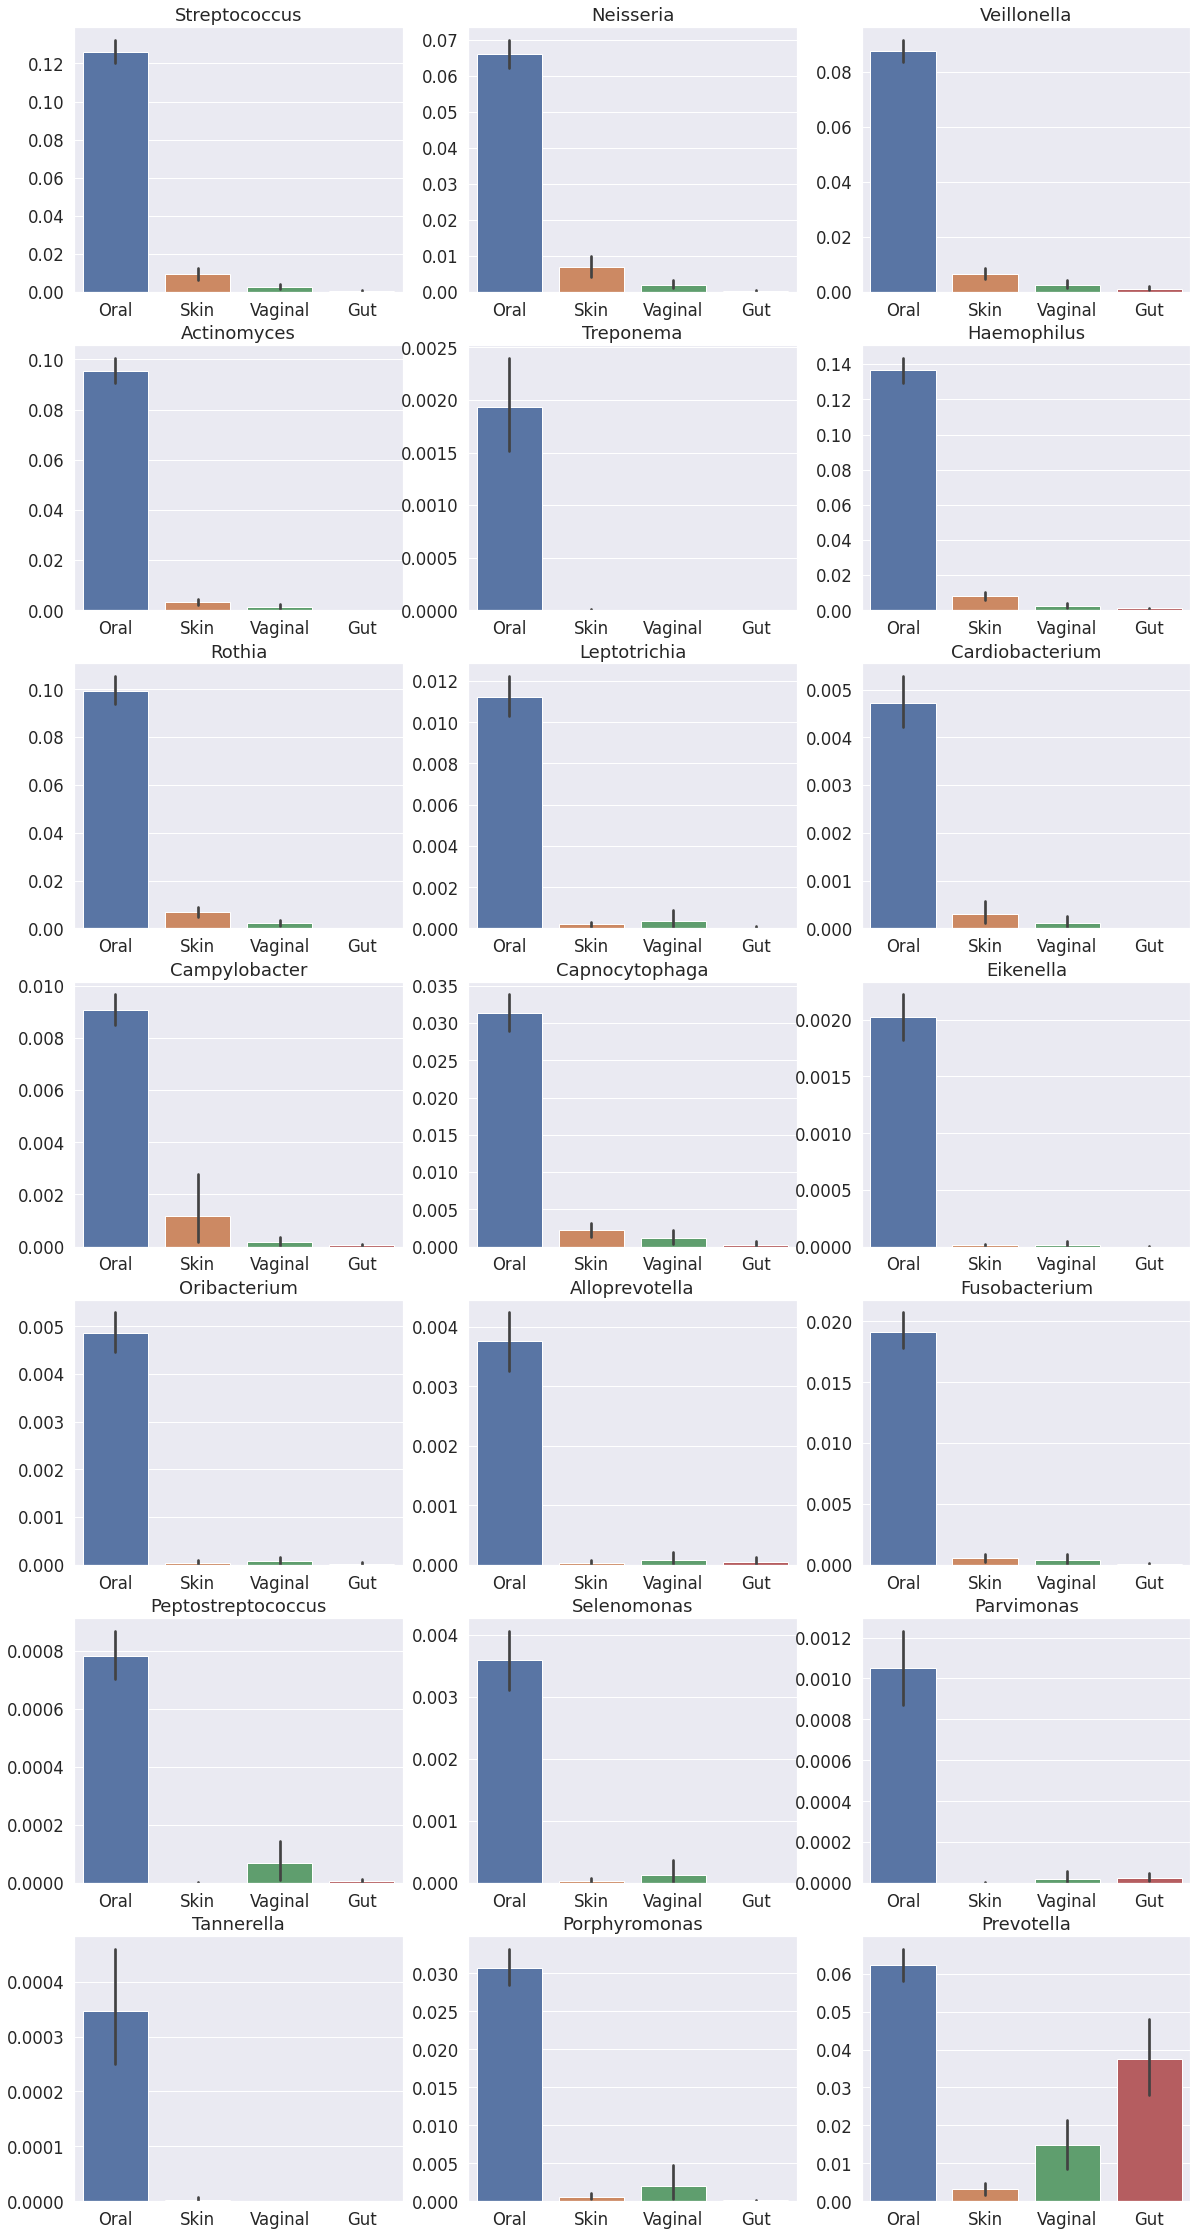

In [37]:
#Double check the selected tissue-specific genera, by ploting their microbial abundances
#check if the selected genera are specific to the tisssues versus microbial organism
import matplotlib.pyplot as plt
plt.figure(figsize = (20, 40))

sample_microb_names = ['Streptococcus', 'Neisseria', 'Veillonella', 'Actinomyces', 'Treponema', 'Haemophilus', 
                       'Rothia', 'Leptotrichia', 'Cardiobacterium', 'Campylobacter', 'Capnocytophaga', 
                       'Eikenella', 'Oribacterium', 'Alloprevotella', 'Fusobacterium', 'Peptostreptococcus', 
                       'Selenomonas', 'Parvimonas', 'Tannerella', 'Porphyromonas', 'Prevotella']

genus_index = [microb2.columns.get_loc([i for i in microb2.columns if ('g__' + j) in i][0]) 
               for j in sample_microb_names]

for i, ind in enumerate(genus_index):
    
    plt.subplot(7, 3, i + 1)
    groupped_data = pd.DataFrame({'Tissue': list(['Oral']*phen1['STArea'].value_counts()['Oral'] + 
                                                 ['Skin']*phen1['STArea'].value_counts()['Skin'] + 
                                                 ['Vaginal']*phen1['STArea'].value_counts()['Vaginal'] + 
                                                 ['Gut']*phen1['STArea'].value_counts()['Gut']),
                             'Abundance': list(microb2.loc[phen1['ID'][phen1['STArea'] == 'Oral'],].iloc[:, ind]) + 
                             list(microb2.loc[phen1['ID'][phen1['STArea'] == 'Skin'],].iloc[:, ind]) + 
                             list(microb2.loc[phen1['ID'][phen1['STArea'] == 'Vaginal'],].iloc[:, ind]) + 
                             list(microb2.loc[phen1['ID'][phen1['STArea'] == 'Gut'],].iloc[:, ind])})
    sns.barplot(x = "Tissue", y = "Abundance", data = groupped_data)
    plt.xlabel("")
    plt.ylabel("")
    plt.title(sample_microb_names[i])

plt.show()

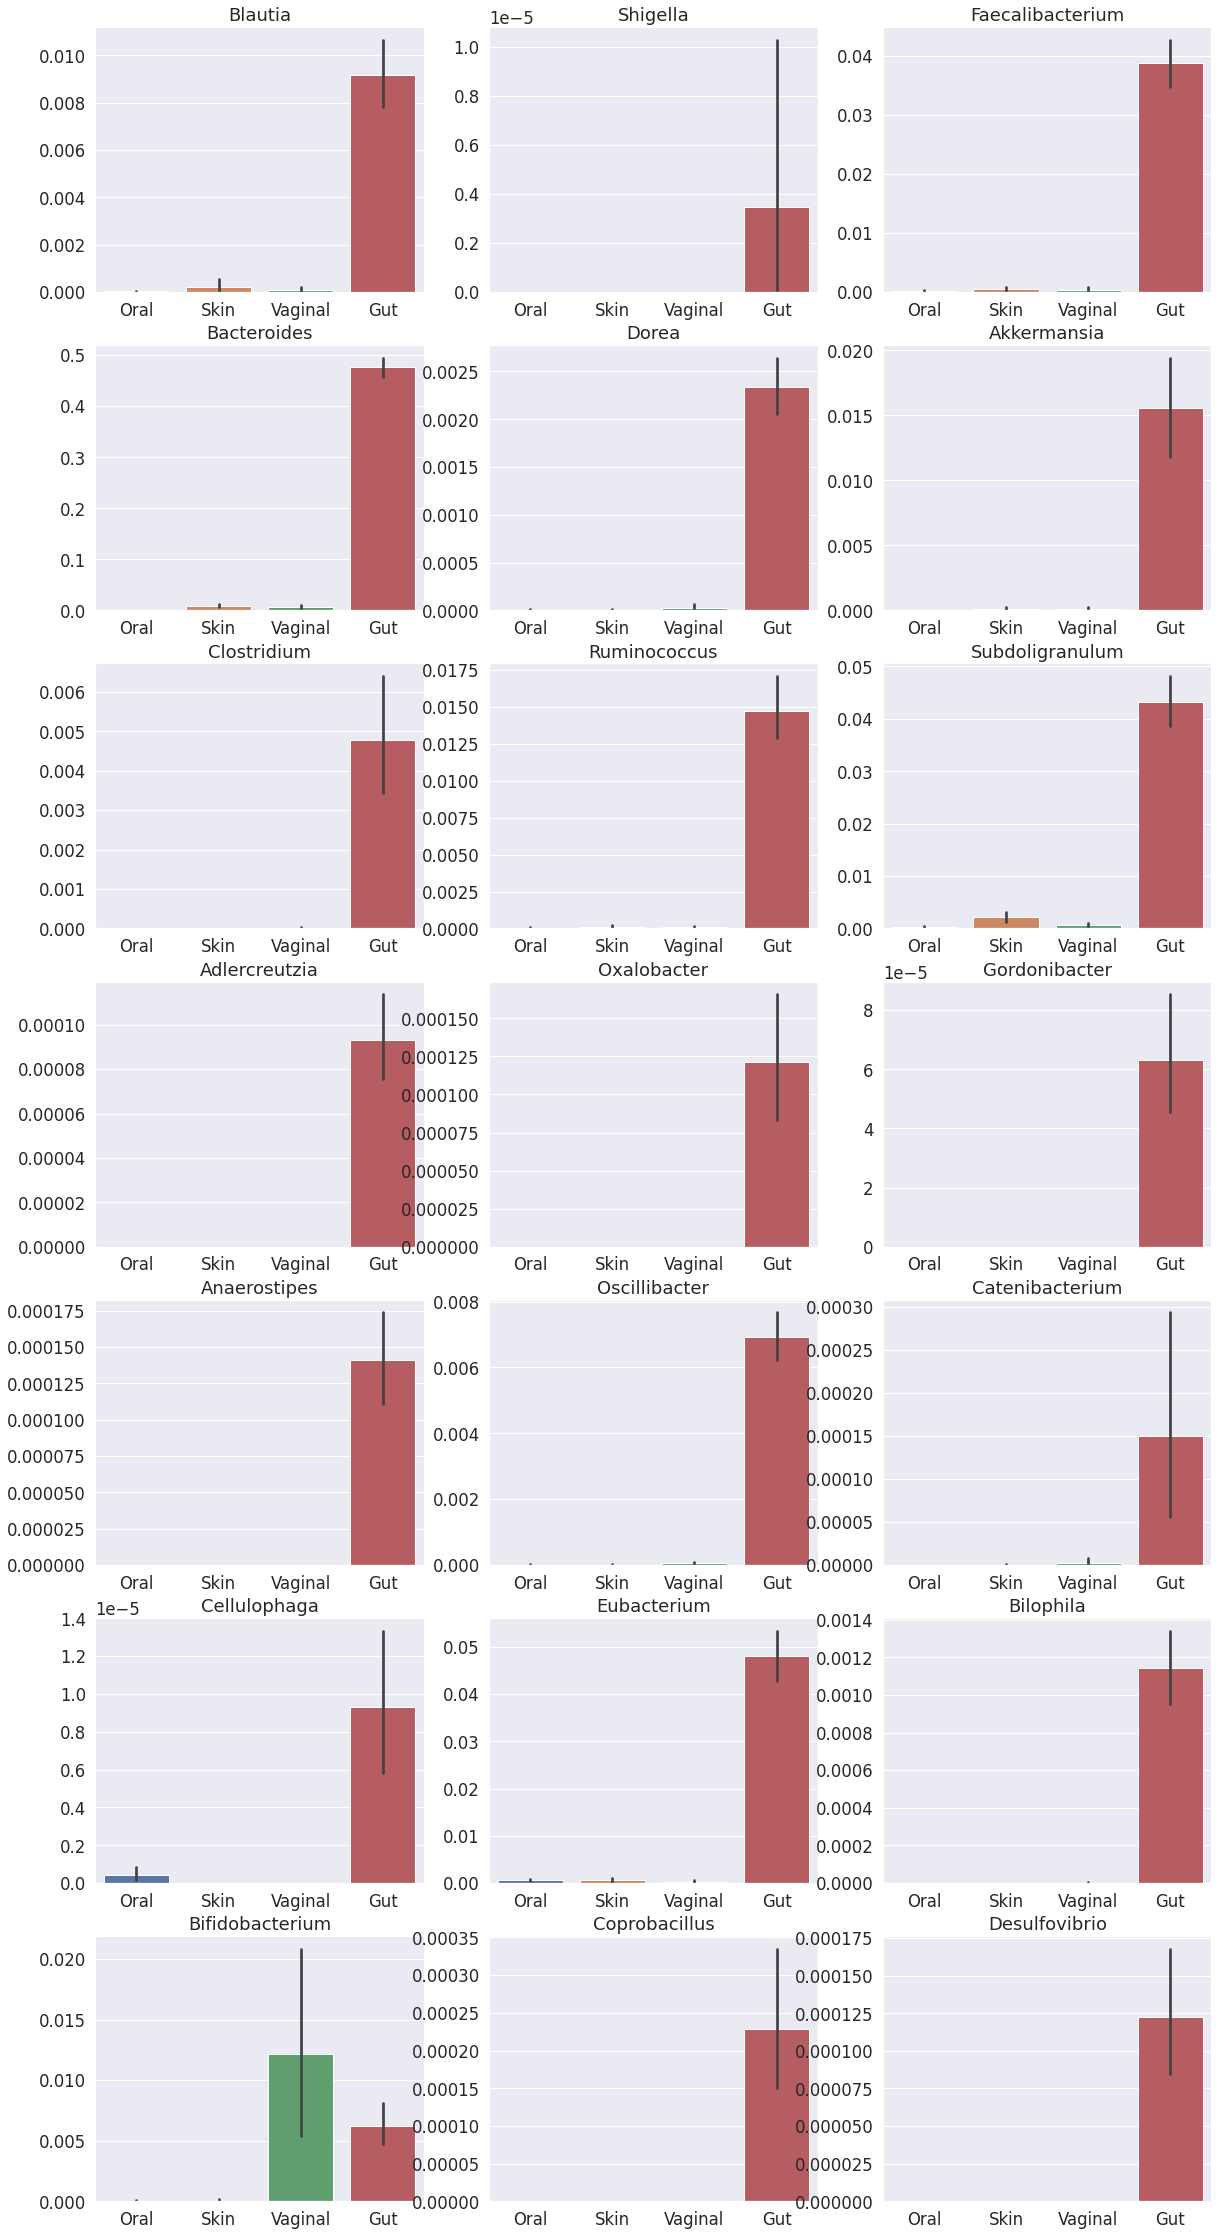

In [38]:
import matplotlib.pyplot as plt
plt.figure(figsize = (20, 40))

sample_microb_names = ['Blautia', 'Shigella', 'Faecalibacterium', 'Bacteroides', 'Dorea', 'Akkermansia', 
                       'Clostridium', 'Ruminococcus', 'Subdoligranulum', 'Adlercreutzia', 'Oxalobacter', 
                       'Gordonibacter', 'Anaerostipes', 'Oscillibacter', 'Catenibacterium', 'Cellulophaga', 
                       'Eubacterium', 'Bilophila', 'Bifidobacterium', 'Coprobacillus', 'Desulfovibrio']

genus_index = [microb2.columns.get_loc([i for i in microb2.columns if ('g__' + j) in i][0]) 
               for j in sample_microb_names]

for i, ind in enumerate(genus_index):
    
    plt.subplot(7, 3, i + 1)
    groupped_data = pd.DataFrame({'Tissue': list(['Oral']*phen1['STArea'].value_counts()['Oral'] + 
                                                 ['Skin']*phen1['STArea'].value_counts()['Skin'] + 
                                                 ['Vaginal']*phen1['STArea'].value_counts()['Vaginal'] + 
                                                 ['Gut']*phen1['STArea'].value_counts()['Gut']),
                             'Abundance': list(microb2.loc[phen1['ID'][phen1['STArea'] == 'Oral'],].iloc[:, ind]) + 
                             list(microb2.loc[phen1['ID'][phen1['STArea'] == 'Skin'],].iloc[:, ind]) + 
                             list(microb2.loc[phen1['ID'][phen1['STArea'] == 'Vaginal'],].iloc[:, ind]) + 
                             list(microb2.loc[phen1['ID'][phen1['STArea'] == 'Gut'],].iloc[:, ind])})
    sns.barplot(x = "Tissue", y = "Abundance", data = groupped_data)
    plt.xlabel("")
    plt.ylabel("")
    plt.title(sample_microb_names[i])

plt.show()

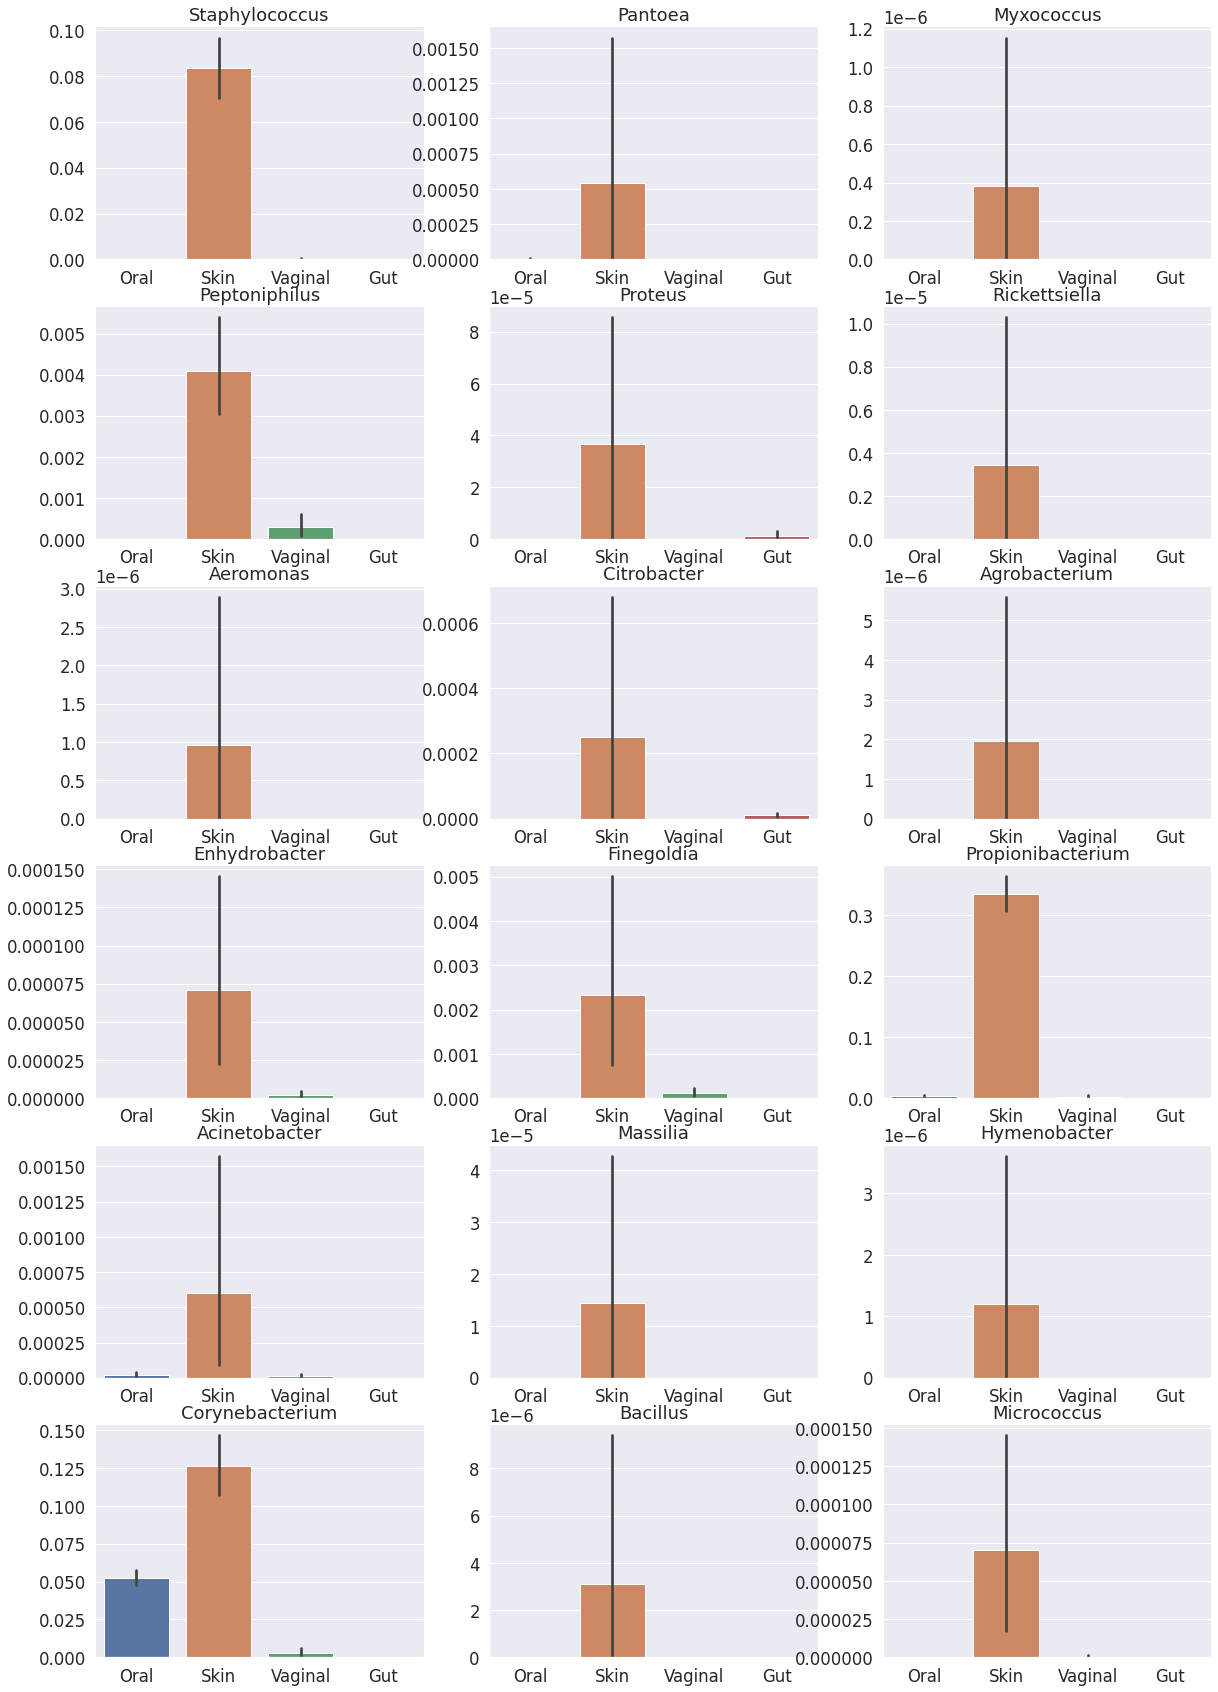

In [39]:
import matplotlib.pyplot as plt
plt.figure(figsize = (20, 30))

sample_microb_names = ['Staphylococcus', 'Pantoea', 'Myxococcus', 'Peptoniphilus', 'Proteus', 
                       'Rickettsiella', 'Aeromonas', 'Citrobacter', 'Agrobacterium', 'Enhydrobacter', 
                       'Finegoldia', 'Propionibacterium', 'Acinetobacter', 'Massilia', 'Hymenobacter', 
                       'Corynebacterium', 'Bacillus', 'Micrococcus']

genus_index = [microb2.columns.get_loc([i for i in microb2.columns if ('g__' + j) in i][0]) 
               for j in sample_microb_names]

for i, ind in enumerate(genus_index):
    
    plt.subplot(6, 3, i + 1)
    groupped_data = pd.DataFrame({'Tissue': list(['Oral']*phen1['STArea'].value_counts()['Oral'] + 
                                                 ['Skin']*phen1['STArea'].value_counts()['Skin'] + 
                                                 ['Vaginal']*phen1['STArea'].value_counts()['Vaginal'] + 
                                                 ['Gut']*phen1['STArea'].value_counts()['Gut']),
                             'Abundance': list(microb2.loc[phen1['ID'][phen1['STArea'] == 'Oral'],].iloc[:, ind]) + 
                             list(microb2.loc[phen1['ID'][phen1['STArea'] == 'Skin'],].iloc[:, ind]) + 
                             list(microb2.loc[phen1['ID'][phen1['STArea'] == 'Vaginal'],].iloc[:, ind]) + 
                             list(microb2.loc[phen1['ID'][phen1['STArea'] == 'Gut'],].iloc[:, ind])})
    sns.barplot(x = "Tissue", y = "Abundance", data = groupped_data)
    plt.xlabel("")
    plt.ylabel("")
    plt.title(sample_microb_names[i])

plt.show()

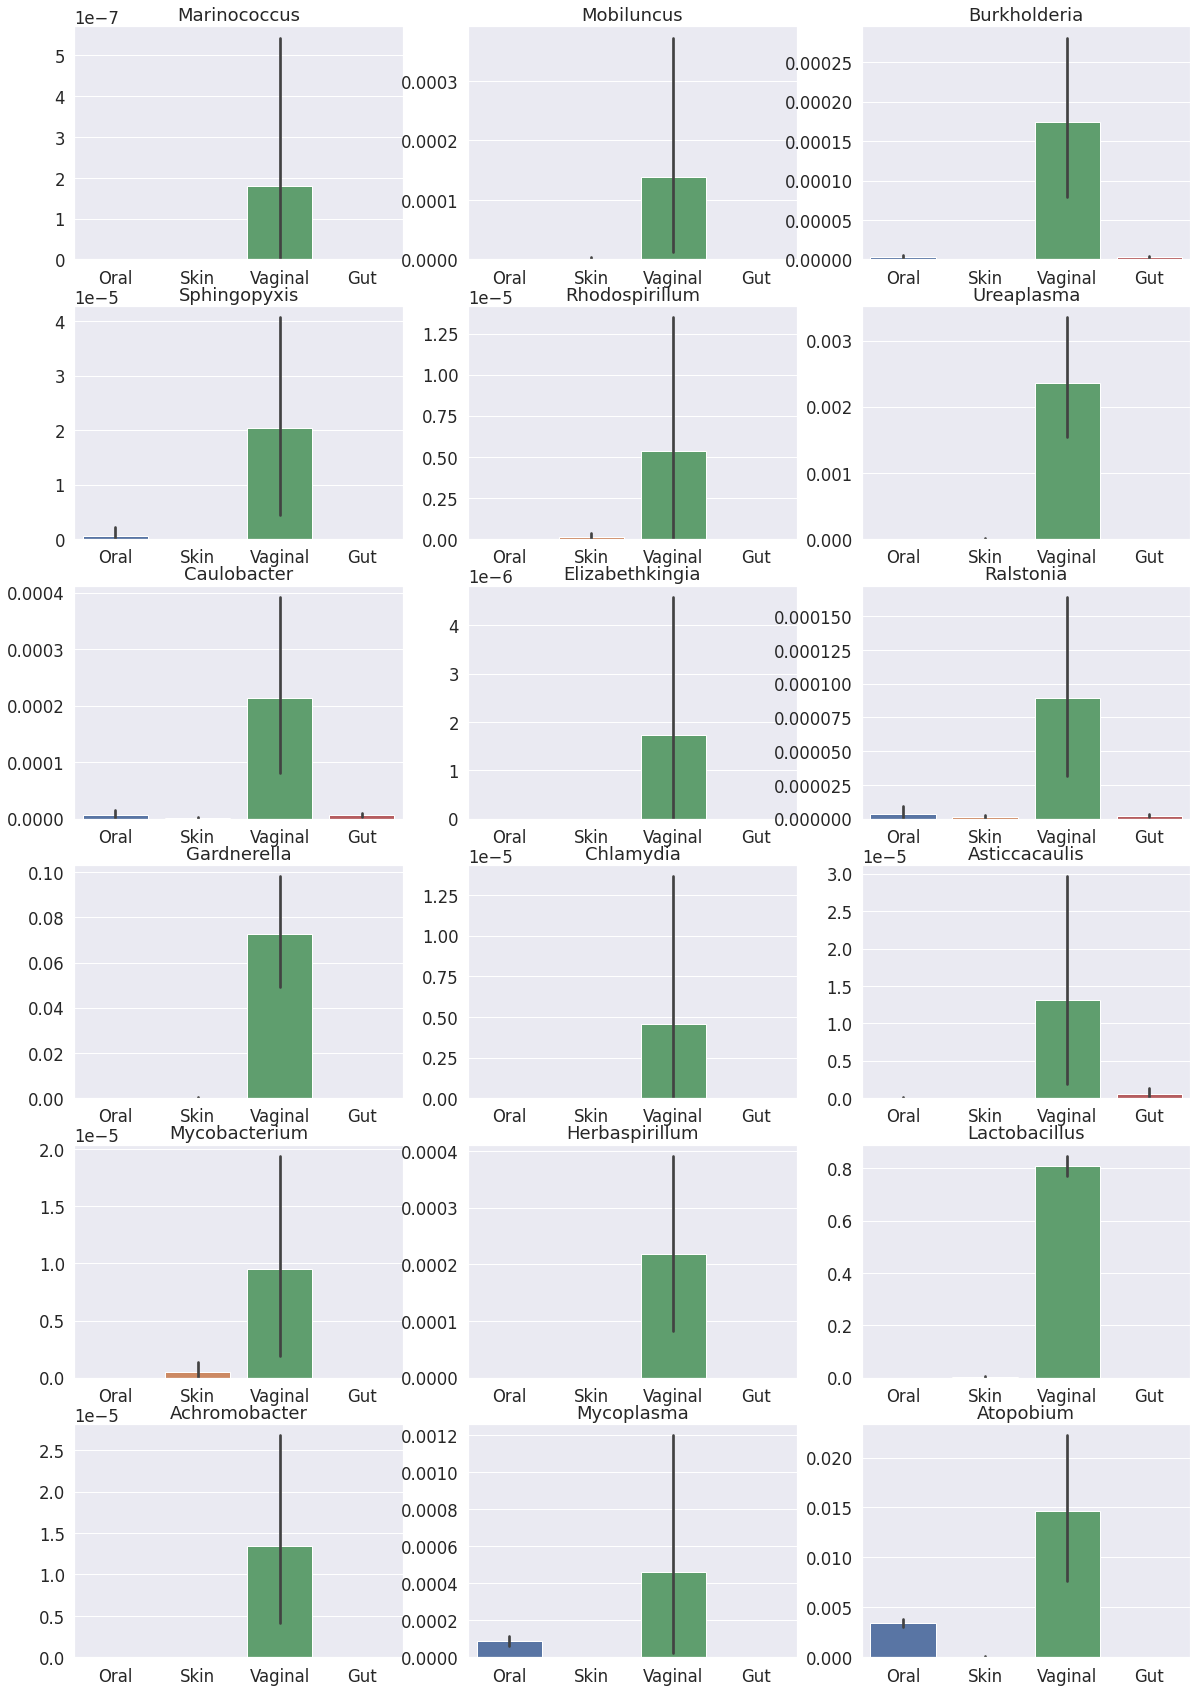

In [40]:
import matplotlib.pyplot as plt
plt.figure(figsize = (20, 30))

sample_microb_names = ['Marinococcus', 'Mobiluncus', 'Burkholderia', 'Sphingopyxis', 'Rhodospirillum', 
                       'Ureaplasma', 'Caulobacter', 'Elizabethkingia', 'Ralstonia', 'Gardnerella', 'Chlamydia', 
                       'Asticcacaulis', 'Mycobacterium', 'Herbaspirillum', 'Lactobacillus', 'Achromobacter', 
                       'Mycoplasma', 'Atopobium']

genus_index = [microb2.columns.get_loc([i for i in microb2.columns if ('g__' + j) in i][0]) 
               for j in sample_microb_names]

for i, ind in enumerate(genus_index):
    
    plt.subplot(6, 3, i + 1)
    groupped_data = pd.DataFrame({'Tissue': list(['Oral']*phen1['STArea'].value_counts()['Oral'] + 
                                                 ['Skin']*phen1['STArea'].value_counts()['Skin'] + 
                                                 ['Vaginal']*phen1['STArea'].value_counts()['Vaginal'] + 
                                                 ['Gut']*phen1['STArea'].value_counts()['Gut']),
                             'Abundance': list(microb2.loc[phen1['ID'][phen1['STArea'] == 'Oral'],].iloc[:, ind]) + 
                             list(microb2.loc[phen1['ID'][phen1['STArea'] == 'Skin'],].iloc[:, ind]) + 
                             list(microb2.loc[phen1['ID'][phen1['STArea'] == 'Vaginal'],].iloc[:, ind]) + 
                             list(microb2.loc[phen1['ID'][phen1['STArea'] == 'Gut'],].iloc[:, ind])})
    sns.barplot(x = "Tissue", y = "Abundance", data = groupped_data)
    plt.xlabel("")
    plt.ylabel("")
    plt.title(sample_microb_names[i])

plt.show()

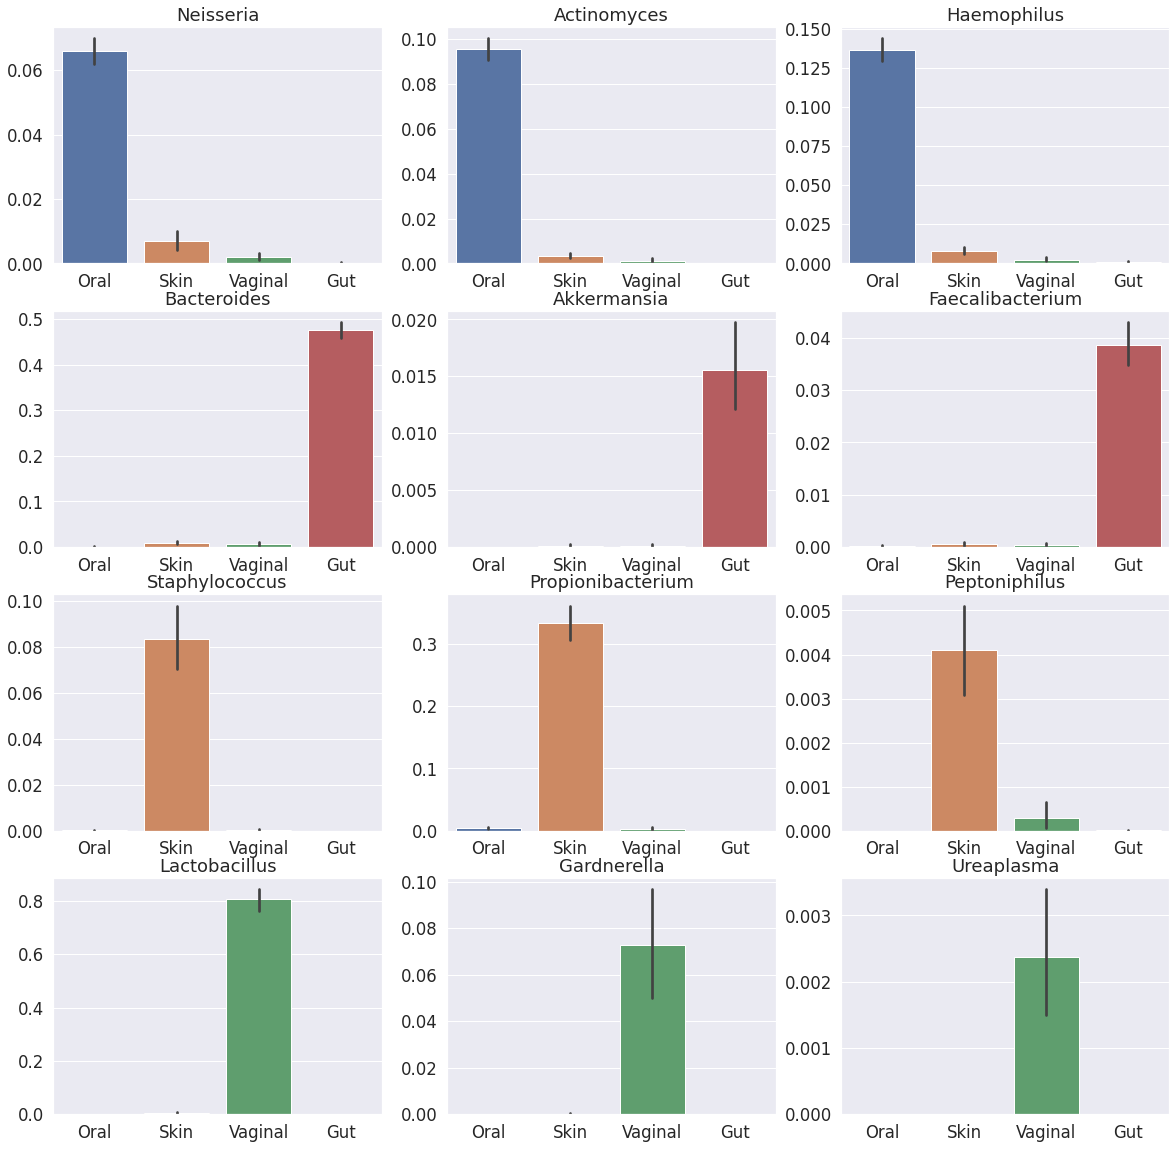

In [41]:
#Visualize the 3 most tissue-specific genera from the 4 tissues (Oral, Gut, Skin, and Vagina)
import matplotlib.pyplot as plt
plt.figure(figsize = (20, 20))

sample_microb_names = ['Neisseria', 'Actinomyces', 'Haemophilus', 
                       'Bacteroides', 'Akkermansia', 'Faecalibacterium', 
                       'Staphylococcus', 'Propionibacterium', 'Peptoniphilus', 
                       'Lactobacillus', 'Gardnerella', 'Ureaplasma']

genus_index = [microb2.columns.get_loc([i for i in microb2.columns if ('g__' + j) in i][0]) 
               for j in sample_microb_names]
for i, ind in enumerate(genus_index):
    
    plt.subplot(4, 3, i + 1)
    groupped_data = pd.DataFrame({'Tissue': list(['Oral']*phen1['STArea'].value_counts()['Oral'] + 
                                                 ['Skin']*phen1['STArea'].value_counts()['Skin'] + 
                                                 ['Vaginal']*phen1['STArea'].value_counts()['Vaginal'] + 
                                                 ['Gut']*phen1['STArea'].value_counts()['Gut']),
                             'Abundance': list(microb2.loc[phen1['ID'][phen1['STArea'] == 'Oral'],].iloc[:, ind]) + 
                             list(microb2.loc[phen1['ID'][phen1['STArea'] == 'Skin'],].iloc[:, ind]) + 
                             list(microb2.loc[phen1['ID'][phen1['STArea'] == 'Vaginal'],].iloc[:, ind]) + 
                             list(microb2.loc[phen1['ID'][phen1['STArea'] == 'Gut'],].iloc[:, ind])})
    sns.barplot(x = "Tissue", y = "Abundance", data = groupped_data)
    plt.xlabel("")
    plt.ylabel("")
    plt.title(sample_microb_names[i])

plt.show()



*  There are a few tissue-specific bacterial genera markers
*   We found 16 tissue-specific genera for vagina


*  Probably by contamination we found Burkholderia, Ralstonia and Bordetella
*   by examined the list of the 16 vagina-specific bacterial genera we concluded that 12 only are vaginal specific bacterial. 






In [42]:
#To avoid bias in the analysis, we selected the 12 most tissue-specific markers from all the 4 tissues..
tis_spec_df = pd.DataFrame({'Oral': ['Neisseria', 'Veillonella', 'Actinomyces', 'Haemophilus', 'Rothia', 
                                     'Leptotrichia', 'Cardiobacterium', 'Capnocytophaga', 'Oribacterium', 
                                     'Alloprevotella', 'Gemella', 'Fusobacterium'], 
                            'Gut': ['Blautia', 'Faecalibacterium', 'Bacteroides', 'Dorea', 'Akkermansia', 
                                    'Clostridium', 'Ruminococcus', 'Subdoligranulum', 'Oxalobacter', 
                                    'Oscillibacter', 'Eubacterium', 'Bilophila'], 
                            'Skin': ['Staphylococcus', 'Peptoniphilus', 'Citrobacter', 'Enhydrobacter', 
                                     'Finegoldia', 'Propionibacterium', 'Acinetobacter', 'Massilia', 
                                     'Hymenobacter', 'Corynebacterium', 'Bacillus', 'Micrococcus'], 
                            'Vagina': ['Mobiluncus', 'Sphingopyxis', 'Ureaplasma', 'Caulobacter', 'Gardnerella', 
                                       'Chlamydia', 'Asticcacaulis', 'Mycobacterium', 'Herbaspirillum', 
                                       'Lactobacillus', 'Achromobacter', 'Atopobium']})
tis_spec_df

Oral               Gut               Skin          Vagina
0         Neisseria           Blautia     Staphylococcus      Mobiluncus
1       Veillonella  Faecalibacterium      Peptoniphilus    Sphingopyxis
2       Actinomyces       Bacteroides        Citrobacter      Ureaplasma
3       Haemophilus             Dorea      Enhydrobacter     Caulobacter
4            Rothia       Akkermansia         Finegoldia     Gardnerella
5      Leptotrichia       Clostridium  Propionibacterium       Chlamydia
6   Cardiobacterium      Ruminococcus      Acinetobacter   Asticcacaulis
7    Capnocytophaga   Subdoligranulum           Massilia   Mycobacterium
8      Oribacterium       Oxalobacter       Hymenobacter  Herbaspirillum
9    Alloprevotella     Oscillibacter    Corynebacterium   Lactobacillus
10          Gemella       Eubacterium           Bacillus   Achromobacter
11    Fusobacterium         Bilophila        Micrococcus       Atopobium



*   We have excluded Streptococcus from the list of oral-specific genera because of : if we grep reference genomes for Streptococcus, we will end up with too many "contaminating" sequences that originate from gut-specific Streptococcus species
*   List item



In [43]:
# run a quick clustering based on Spearman correlation distance between the samples and using the 48 selected microbial genera
microb_genus = microb2
microb_genus.columns = [i.split('|')[5] for i in microb_genus.columns]
microb_genus.columns = [i.replace('g__','') for i in microb_genus.columns]
microb_genus

Granulicella  Terriglobus  Actinobaculum  Actinomyces  Mobiluncus  \
SRS011061           0.0          0.0       0.000000     0.000000         0.0   
SRS011084           0.0          0.0       0.000000     0.000000         0.0   
SRS011086           0.0          0.0       0.000061     0.117511         0.0   
SRS011090           0.0          0.0       0.000000     0.027362         0.0   
SRS011098           0.0          0.0       0.014370     0.118618         0.0   
...                 ...          ...            ...          ...         ...   
SRS971275           0.0          0.0       0.000000     0.000000         0.0   
SRS971276           0.0          0.0       0.000000     0.000000         0.0   
SRS971277           0.0          0.0       0.000000     0.027179         0.0   
SRS971427           0.0          0.0       0.000000     0.000000         0.0   
SRS971428           0.0          0.0       0.000000     0.000000         0.0   

           Varibaculum  Brevibacterium  Cellulomonas  Corynebacterium  \
SRS011061          0.0        0.000000           0.0         0.000000   
SRS011084          0.0        0.000000           0.0         0.000000   
SRS011086          0.0        0.000195           0.0         0.000035   
SRS011090          0.0        0.000000           0.0         0.000056   
SRS011098          0.0        0.000029           0.0         0.131278   
...                ...             ...           ...              ...   
SRS971275          0.0        0.000000           0.0         0.000000   
SRS971276          0.0        0.000000           0.0         0.000000   
SRS971277          0.0        0.000051           0.0         0.000000   
SRS971427          0.0        0.000000           0.0         0.120302   
SRS971428          0.0        0.000000           0.0         0.080204   

           Turicella  ...  Brachyspira  Treponema  Fretibacterium  \
SRS011061        0.0  ...          0.0   0.000000             0.0   
SRS011084        0.0  ...          0.0   0.000000             0.0   
SRS011086        0.0  ...          0.0   0.000000             0.0   
SRS011090        0.0  ...          0.0   0.000000             0.0   
SRS011098        0.0  ...          0.0   0.000004             0.0   
...              ...  ...          ...        ...             ...   
SRS971275        0.0  ...          0.0   0.000000             0.0   
SRS971276        0.0  ...          0.0   0.000000             0.0   
SRS971277        0.0  ...          0.0   0.000008             0.0   
SRS971427        0.0  ...          0.0   0.000000             0.0   
SRS971428        0.0  ...          0.0   0.000000             0.0   

           Jonquetella  Pyramidobacter  Synergistes  Candidatus_Phytoplasma  \
SRS011061          0.0             0.0          0.0                     0.0   
SRS011084          0.0             0.0          0.0                     0.0   
SRS011086          0.0             0.0          0.0                     0.0   
SRS011090          0.0             0.0          0.0                     0.0   
SRS011098          0.0             0.0          0.0                     0.0   
...                ...             ...          ...                     ...   
SRS971275          0.0             0.0          0.0                     0.0   
SRS971276          0.0             0.0          0.0                     0.0   
SRS971277          0.0             0.0          0.0                     0.0   
SRS971427          0.0             0.0          0.0                     0.0   
SRS971428          0.0             0.0          0.0                     0.0   

           Mycoplasma  Ureaplasma  Akkermansia  
SRS011061         0.0         0.0     0.003018  
SRS011084         0.0         0.0     0.003518  
SRS011086         0.0         0.0     0.000000  
SRS011090         0.0         0.0     0.000000  
SRS011098         0.0         0.0     0.000000  
...               ...         ...          ...  
SRS971275         0.0         0.0     0.001905  
SRS

In [44]:
gen_list = ['Neisseria', 'Veillonella', 'Actinomyces', 'Haemophilus', 'Rothia', 'Leptotrichia', 'Cardiobacterium', 
            'Capnocytophaga', 'Oribacterium', 'Alloprevotella', 'Fusobacterium', 'Blautia', 'Faecalibacterium', 
            'Bacteroides', 'Dorea', 'Akkermansia', 'Clostridium', 'Ruminococcus', 'Subdoligranulum', 
            'Oxalobacter', 'Oscillibacter', 'Eubacterium', 'Bilophila', 'Staphylococcus', 'Peptoniphilus', 
            'Citrobacter', 'Enhydrobacter', 'Finegoldia', 'Propionibacterium', 'Acinetobacter', 'Massilia', 
            'Hymenobacter', 'Corynebacterium', 'Bacillus', 'Micrococcus', 'Mobiluncus', 'Sphingopyxis', 
            'Ureaplasma', 'Caulobacter', 'Gardnerella', 'Chlamydia', 'Asticcacaulis', 'Mycobacterium', 
            'Herbaspirillum', 'Lactobacillus', 'Achromobacter', 'Atopobium']
print(gen_list)

['Neisseria', 'Veillonella', 'Actinomyces', 'Haemophilus', 'Rothia', 'Leptotrichia', 'Cardiobacterium', 'Capnocytophaga', 'Oribacterium', 'Alloprevotella', 'Fusobacterium', 'Blautia', 'Faecalibacterium', 'Bacteroides', 'Dorea', 'Akkermansia', 'Clostridium', 'Ruminococcus', 'Subdoligranulum', 'Oxalobacter', 'Oscillibacter', 'Eubacterium', 'Bilophila', 'Staphylococcus', 'Peptoniphilus', 'Citrobacter', 'Enhydrobacter', 'Finegoldia', 'Propionibacterium', 'Acinetobacter', 'Massilia', 'Hymenobacter', 'Corynebacterium', 'Bacillus', 'Micrococcus', 'Mobiluncus', 'Sphingopyxis', 'Ureaplasma', 'Caulobacter', 'Gardnerella', 'Chlamydia', 'Asticcacaulis', 'Mycobacterium', 'Herbaspirillum', 'Lactobacillus', 'Achromobacter', 'Atopobium']


In [45]:
microb_genus_selected = microb_genus[gen_list]
print(microb_genus_selected.shape)
microb_genus_selected

(2355, 47)


Neisseria  Veillonella  Actinomyces  Haemophilus    Rothia  \
SRS011061   0.000000     0.000676     0.000000     0.000350  0.000000   
SRS011084   0.000000     0.000074     0.000000     0.000140  0.000000   
SRS011086   0.000580     0.111812     0.117511     0.039997  0.122279   
SRS011090   0.028027     0.039875     0.027362     0.197183  0.038528   
SRS011098   0.004748     0.011116     0.118618     0.031137  0.444377   
...              ...          ...          ...          ...       ...   
SRS971275   0.000000     0.000000     0.000000     0.000000  0.000000   
SRS971276   0.000000     0.000918     0.000000     0.001092  0.000000   
SRS971277   0.001009     0.108100     0.027179     0.257675  0.351003   
SRS971427   0.000000     0.000000     0.000000     0.000000  0.000084   
SRS971428   0.000000     0.000000     0.000000     0.000000  0.000000   

           Leptotrichia  Cardiobacterium  Capnocytophaga  Oribacterium  \
SRS011061      0.000000         0.000000        0.000000      0.000000   
SRS011084      0.000000         0.000000        0.000000      0.000000   
SRS011086      0.001147         0.000034        0.000562      0.008408   
SRS011090      0.019240         0.000082        0.030566      0.000000   
SRS011098      0.006427         0.014847        0.068869      0.000224   
...                 ...              ...             ...           ...   
SRS971275      0.000000         0.000000        0.000000      0.000000   
SRS971276      0.000000         0.000000        0.000000      0.000000   
SRS971277      0.000088         0.000035        0.001030      0.002810   
SRS971427      0.000000         0.000000        0.000000      0.000000   
SRS971428      0.000000         0.000000        0.000000      0.000000   

           Alloprevotella  ...  Ureaplasma  Caulobacter  Gardnerella  \
SRS011061        0.000000  ...         0.0          0.0     0.000000   
SRS011084        0.000000  ...         0.0          0.0     0.000000   
SRS011086        0.000006  ...         0.0          0.0     0.000000   
SRS011090        0.002879  ...         0.0          0.0     0.000000   
SRS011098        0.000058  ...         0.0          0.0     0.000000   
...                   ...  ...         ...          ...          ...   
SRS971275        0.000027  ...         0.0          0.0     0.000000   
SRS971276        0.000000  ...         0.0          0.0     0.000000   
SRS971277        0.000024  ...         0.0          0.0     0.000000   
SRS971427        0.000000  ...         0.0          0.0     0.000000   
SRS971428        0.000167  ...         0.0          0.0     0.004806   

           Chlamydia  Asticcacaulis  Mycobacterium  Herbaspirillum  \
SRS011061        0.0            0.0            0.0             0.0   
SRS011084        0.0            0.0            0.0             0.0   
SRS011086        0.0            0.0            0.0             0.0   
SRS011090        0.0            0.0            0.0             0.0   
SRS011098        0.0            0.0            0.0             0.0   
...              ...            ...            ...             ...   
SRS971275        0.0            0.0            0.0             0.0   
SRS971276        0.0            0.0            0.0             0.0   
SRS971277        0.0            0.0            0.0             0.0   
SRS971427        0.0            0.0            0.0             0.0   
SRS971428        0.0            0.0            0.0             0.0   

           Lactobacillus  Achromobacter  Atopobium  
SRS011061       0.000000            0.0   0.000000  
SRS011084       0.000000            0.0   0.000000  
SRS011086       0.000181            0.0   0.002290  
SRS011090       0.041174            0.0   0.000000  
SRS011098       0.000039            0.0   0.000048  
...                  ...            ...        ...  
SRS971275       0.000000            0.0   0.000000  
SRS971276       0.000000            0.0   0.000000  
SRS971277       0.000000            0.0   0.000686  
SRS971427

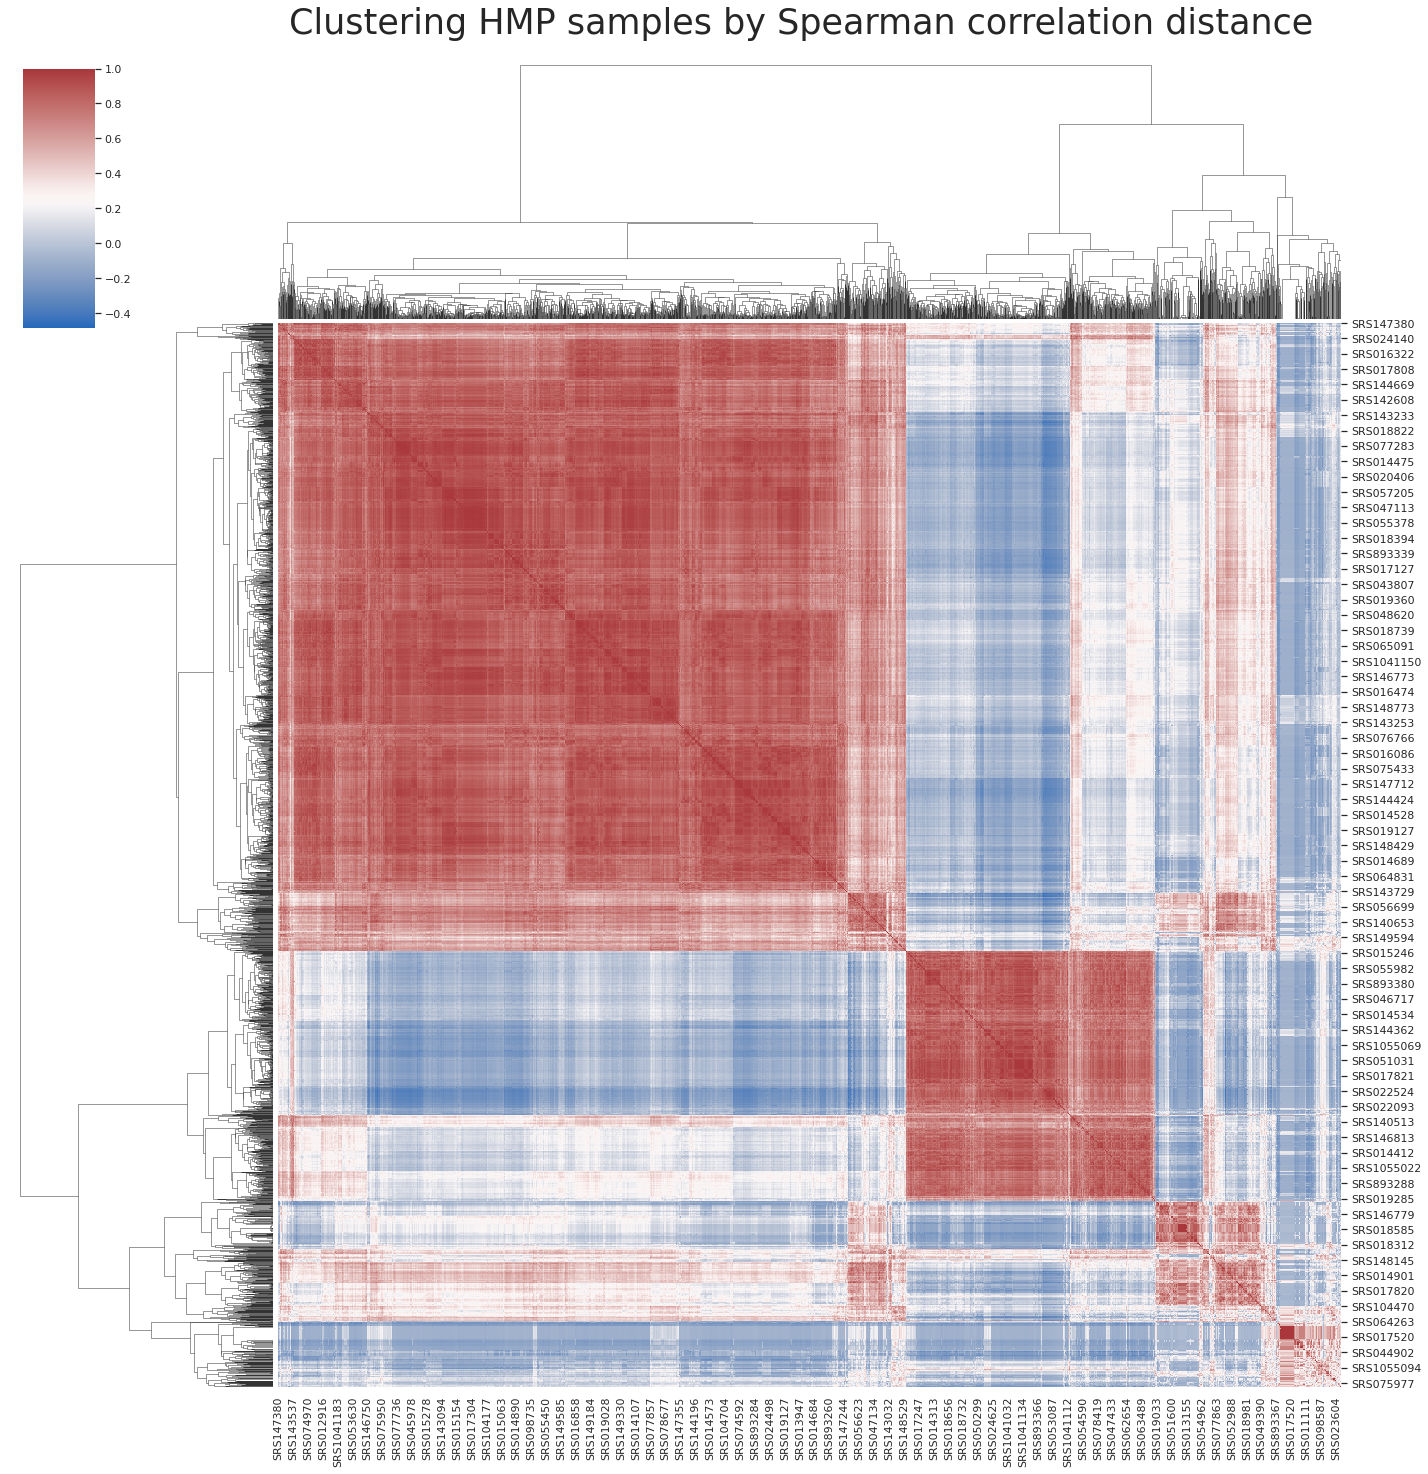

In [46]:
#Spearman correlation distance
import scipy as sp
import seaborn as sns

sns.set(font_scale = 1)

rho, _ = sp.stats.spearmanr(microb_genus_selected.T)
rho = pd.DataFrame(rho, index = microb_genus_selected.index, columns = microb_genus_selected.index)
sns.clustermap(rho, cmap = 'vlag', figsize = (20, 20))
plt.text(5, 1.2,'Clustering HMP samples by Spearman correlation distance', fontsize = 35)

plt.show()

Remarks:


*   We found that 4 clusters corresponding to the Oral, Gut, Skin and Vagina samples from the HMP project.
*   largest cluster are the Oral samples.
*   The second largest cluster are corresponds to the Gut HMP samples
*   List item





In [ ]:
!head MapBactName2ID.txt

head: cannot open 'MapBactName2ID.txt' for reading: No such file or directory
